In [1]:
import datetime as dt

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn import preprocessing

import pyarrow.parquet as pq
import s3fs

import pandas as pd
tqdm.pandas()

## Create the ratios columns on the preprocessed STB Data

In [2]:
data = pd.read_csv("/home/ubuntu/Notebooks/Data/01-Preprocessed_data_2018-07-01_to_2018_07_31.csv")

In [3]:
# Ordering of the columns in the correct order
data = data[['di_account_num', 'duration_seconds', 'viewing_duration_seconds',
       'station_hdtv', 'station_sdtv', 'station_sports', 'station_tve', 'A&E',
       'AMC', 'BET', 'CMT', 'CNBC', 'CNN', 'E!', 'ESPN', 'ESPNU', 'FX', 'FXM',
       'FXX', 'GAC', 'GSN', 'HGTV', 'HLN', 'IFC', 'INSP', 'ION', 'MSNBC',
       'MTV', 'MTV2', 'NBA TV', 'OWN', 'SYFY', 'TBS', 'TLC', 'TNT', 'UNIVERSO',
       'UP', 'USA', 'VH1', 'VICELAND', 'Drama_view', 'Sports_view',
       'Reality_view', 'Entertainment_view', 'Documentary_view', 'Kids_view',
       'Family_view', 'Animals_view', 'News_view', 'Movie_view', 'Music_view',
       'Teen_view', 'Science & Technology_view', 'Health & Fitness_view',
       'Religion_view', 'Shopping_view', 'Misellaneous_view', 'Drama_d',
       'Sports_d', 'Reality_d', 'Entertainment_d', 'Documentary_d', 'Kids_d',
       'Family_d', 'Animals_d', 'News_d', 'Movie_d', 'Music_d', 'Teen_d',
       'Science & Technology_d', 'Health & Fitness_d', 'Religion_d',
       'Shopping_d', 'Misellaneous_d']]

numerator_columns = list(data.columns)[40:57]
denominator_columns = list(data.columns)[57:]

ratios = pd.DataFrame(np.array(data.loc[:,numerator_columns])/ np.array(data.loc[:,denominator_columns]), columns = ['Drama_ratio', 'Sports_ratio', 'Reality_ratio', 'Entertainment_ratio', 'Documentary_ratio', 'Kids_ratio', 'Family_ratio', 'Animals_ratio', 'News_ratio', 'Movie_ratio', 'Music_ratio', 'Teen_ratio', 'Science & Technology_ratio', 'Health & Fitness_ratio', 'Religion_ratio', 'Shopping_ratio', 'Misellaneous_ratio'])    

data_stb = pd.concat([data, ratios], axis = 1)
data_stb.fillna(0, inplace = True)
del data
del ratios
data_stb.head()


/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


,di_account_num,duration_seconds,viewing_duration_seconds,station_hdtv,station_sdtv,station_sports,station_tve,A&E,AMC,BET,...,Animals_ratio,News_ratio,Movie_ratio,Music_ratio,Teen_ratio,Science & Technology_ratio,Health & Fitness_ratio,Religion_ratio,Shopping_ratio,Misellaneous_ratio
0,++++yXWkYNIEvfB83VGZTvx8hyDTT0WthqMuggmF9Iw=,222174.0,192537.0,152,0,95,96,56,0,0,...,0.0,1.000000,0.856551,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,+++3n/bvVs1hAtJ8lHS/4xa1sBv5l1oTCfyZuztVDjk=,98919.0,89831.0,44,0,0,44,0,1,0,...,0.0,0.989336,0.839244,0.0,0.777964,0.0,0.0,0.0,0.0,0.0
2,+++5Cs2yHlqypQ0OybE3Ga0Hj5Fuf2ZCA6uCazOxFk8=,11503.0,11503.0,18,0,0,18,0,0,0,...,0.0,0.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,1.0
3,+++Brw+WK4d8VrHsTFBTZaXFBGFn4Zy/ZmimCXjSOjw=,16819.0,16819.0,22,0,0,22,5,4,0,...,0.0,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
4,+++GBgwGiQRhkzeS0uK10Oj6/wi4YbqaSVIsf3feJIA=,11201.0,11201.0,20,0,0,20,0,0,0,...,0.0,1.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,1.0,0.0


## Open the AIDB DataSet in order to preprocess it and add the features into the clustering features (STB + AIDB)

In [4]:
s3 = s3fs.S3FileSystem()

data_aidb = pq.ParquetDataset('s3://columbia-aidb/test_mehdi', filesystem=s3).read_pandas().to_pandas()
data_aidb.head()

,account_number,afn_ind,age,analog_active_ind,bb_computer_owner_bin,bb_premium_credit_card_bin,bb_presence_of_creditcard_bin,biz_resi_flag,child_age_0t18_v3_bin,child_age_0t3_v3_bin,...,rur_urbn_cntysize_code_bin,showtime,sports_pkg,v_hhld_female_ind_bin,v_hhld_male_ind_bin,video_active_ind,wealthfinder_bin,wireless_active_ind,x1_platform,zip
0,7VrrIrhQRIheQdYFbFUc9CyLi7teRUduNu8SXpFIQg0=,A,55 - 64,N,Y,U,Y,R,5U,5N,...,Metro,N,N,Y,Y,Y,High Value,N,Y,07042
1,uMauADVWEonihLr45ytk4K25EKfG7Cd5nXKuk714jyE=,A,65+ Years,N,U,U,U,R,5N,5N,...,Metro,N,N,N,Y,Y,Low Value,N,Y,02119
2,NBpPnSbdA9kg3eCHzmC1k/cdS3Hu60QxfQDcncryZww=,A,<25 Years,N,Y,U,U,R,5U,5N,...,Metro,N,N,Y,N,Y,Low Value,N,Y,93277
3,TeRL16AWXrXFgRnIGvOiR87TNJSNTRqHN/JAZPIJu+k=,A,65+ Years,N,U,U,U,R,5U,5N,...,Metro,N,N,Y,N,Y,Low Value,N,Y,33024
4,bjTaxsYIhmQVMtbr5cwX282DIGEtyy1mXHF6c97RR3U=,A,55 - 64,N,Y,U,Y,R,5N,5N,...,Metro,Y,N,Y,Y,Y,Low Value,Y,Y,80503


### Examine the AIDB Dataset and choose the columns to transform into features

In [5]:
merged_data = data_stb[["di_account_num", "duration_seconds"]].merge(data_aidb, how = 'inner', left_on = "di_account_num", right_on = "account_number")
merged_data.drop(columns = ["di_account_num", "duration_seconds"], inplace = True)
merged_data.set_index("account_number", inplace = True)
del data_aidb
data_aidb = merged_data
del merged_data

In [6]:
data_aidb.columns

Index(['afn_ind', 'age', 'analog_active_ind', 'bb_computer_owner_bin',
       'bb_premium_credit_card_bin', 'bb_presence_of_creditcard_bin',
       'biz_resi_flag', 'child_age_0t18_v3_bin', 'child_age_0t3_v3_bin',
       'child_age_10t12_v3_bin', 'child_age_13t15_v3_bin',
       'child_age_16t18_v3_bin', 'child_age_4t6_v3_bin',
       'child_age_7t9_v3_bin', 'cinemax', 'dig_sports_tier',
       'digital_active_ind', 'dsf_delivery_type', 'eb_lui_interest_clothing',
       'eb_lui_hi_tech_owner', 'eb_lui_home_enter_tv_vid',
       'eb_lui_mob_music_video', 'est_median_family_income',
       'estimated_income_v4_bin', 'et_country_code', 'et_country_code_bin',
       'et_ethnicity_code_bin', 'et_ethnicity_code', 'et_group_code',
       'family_tier', 'gapowncomppckuprk_bin', 'gender', 'household_size',
       'hsi_active_ind', 'income', 'member_2_age_bin', 'member_2_gender_bin',
       'member_3_age_bin', 'member_3_gender_bin', 'member_4_age_bin',
       'member_4_gender_bin', 'networth_v3

In [7]:
to_drop = ["afn_ind", "analog_active_ind", "bb_computer_owner_bin", "bb_premium_credit_card_bin",
          "bb_presence_of_creditcard_bin", "biz_resi_flag",  "child_age_0t3_v3_bin", 
           'child_age_10t12_v3_bin', 'child_age_13t15_v3_bin','child_age_16t18_v3_bin', 
           'child_age_4t6_v3_bin', 'child_age_7t9_v3_bin', "digital_active_ind",
          "dsf_delivery_type", "eb_lui_interest_clothing", "eb_lui_hi_tech_owner",
          "eb_lui_home_enter_tv_vid", "eb_lui_mob_music_video",  "eb_lui_mob_music_video",
          "est_median_family_income", "et_country_code", "et_country_code_bin",
          "et_ethnicity_code_bin", "et_ethnicity_code", "et_group_code", 
           "family_tier", "gapowncomppckuprk_bin", "hsi_active_ind", 
           'member_2_age_bin', 'member_2_gender_bin', 'member_3_age_bin', 
           'member_3_gender_bin', 'member_4_age_bin', 'member_4_gender_bin',
          "networth_v3_2", "prop_realty_homeindicator_bin", "rur_urbn_cntysize_code_bin",
          "sports_pkg", "v_hhld_female_ind_bin","video_active_ind",
          "wireless_active_ind", "x1_platform", "zip"]

data_aidb.drop(columns = to_drop, inplace = True)

In [8]:
data_aidb.head()

,age,child_age_0t18_v3_bin,cinemax,dig_sports_tier,estimated_income_v4_bin,gender,household_size,income,num_adults_living_unit_bin,num_person_living_unit_bin,region_name,showtime,v_hhld_male_ind_bin,wealthfinder_bin
account_number,,,,,,,,,,,,,,
++++yXWkYNIEvfB83VGZTvx8hyDTT0WthqMuggmF9Iw=,25 - 34,5U,Y,Y,<$50K,M,2,<$50K,2,2,CALIFORNIA REGION,Y,Y,Low Value
+++3n/bvVs1hAtJ8lHS/4xa1sBv5l1oTCfyZuztVDjk=,45 - 54,5N,Y,N,<$50K,M,1,<$50K,1,1,BELTWAY REGION,Y,Y,Low Value
+++5Cs2yHlqypQ0OybE3Ga0Hj5Fuf2ZCA6uCazOxFk8=,None,None,N,Y,None,None,None,None,None,None,FLORIDA REGION,N,None,None
+++Brw+WK4d8VrHsTFBTZaXFBGFn4Zy/ZmimCXjSOjw=,None,None,N,N,None,None,None,None,None,None,KEYSTONE REGION,N,None,None
+++GBgwGiQRhkzeS0uK10Oj6/wi4YbqaSVIsf3feJIA=,25 - 34,5Y,N,N,$125K - $149K,M,2,$125K - $149K,2,2,MOUNTAIN WEST REGION,N,Y,Mid Value


In [9]:
data_aidb[data_aidb["age"].isnull()]

,age,child_age_0t18_v3_bin,cinemax,dig_sports_tier,estimated_income_v4_bin,gender,household_size,income,num_adults_living_unit_bin,num_person_living_unit_bin,region_name,showtime,v_hhld_male_ind_bin,wealthfinder_bin
account_number,,,,,,,,,,,,,,
+++5Cs2yHlqypQ0OybE3Ga0Hj5Fuf2ZCA6uCazOxFk8=,None,None,N,Y,None,None,None,None,None,None,FLORIDA REGION,N,None,None
+++Brw+WK4d8VrHsTFBTZaXFBGFn4Zy/ZmimCXjSOjw=,None,None,N,N,None,None,None,None,None,None,KEYSTONE REGION,N,None,None
+++NeARxVjYaGwq1jqlRG0Nso72JRA61aBpXJmhSBK0=,None,None,N,N,None,None,None,None,None,None,CHICAGO REGION,N,None,None
+++haNDkESUmTU7vC5iNyJXRJAij423s2FWK59k/lXY=,None,None,N,N,None,None,None,None,None,None,FLORIDA REGION,N,None,None
++0DnbjQ7f3m0Yq3xqgvkD+BfVScX2dl95p9vHINUhw=,None,None,N,N,None,None,None,None,None,None,WESTERN NEW ENGLAND REGION,N,None,None
++0YSTxj1/0mQkRUltXxSP7wptSLklIKByXwVaiYjhM=,None,None,N,N,None,None,None,None,None,None,FLORIDA REGION,N,None,None
++0qioarXEjiScE/a9sa6k+MPQAwi2/gZIm3Q8DoWJc=,None,None,Y,N,None,None,None,None,None,None,BIG SOUTH REGION,Y,None,None
++1pe59EIQeXGTdu2fN1p/DU11loK3VnA8faBQtdYRc=,None,None,Y,Y,None,None,None,None,None,None,KEYSTONE REGION,Y,None,None
++1qjVlxNSUzFqRkG55E69NkN+wkOahTx/UVXnzfBXY=,None,None,Y,Y,None,None,None,None,None,None,GREATER BOSTON REGION,Y,None,None


## Fill missing values with the distribution observed in the data

In [10]:
for col in data_aidb.columns:
    print(col)
    print('-----------------')
    s = data_aidb[col].value_counts(normalize=True)
    missing = data_aidb[col].isnull()
    data_aidb.loc[missing, col] = np.random.choice(s.index, size = len(data_aidb[missing]),p = s.values)




age
-----------------
child_age_0t18_v3_bin
-----------------
cinemax
-----------------
dig_sports_tier
-----------------
estimated_income_v4_bin
-----------------
gender
-----------------
household_size
-----------------
income
-----------------
num_adults_living_unit_bin
-----------------
num_person_living_unit_bin
-----------------
region_name
-----------------
showtime
-----------------
v_hhld_male_ind_bin
-----------------
wealthfinder_bin
-----------------


In [11]:
data_aidb = pd.get_dummies(data_aidb)
data_aidb.reset_index(level=0, inplace = True)
data_aidb.head()

,account_number,age_25 - 34,age_35 - 44,age_45 - 54,age_55 - 64,age_65+ Years,age_<25 Years,child_age_0t18_v3_bin_1Y,child_age_0t18_v3_bin_5N,child_age_0t18_v3_bin_5U,...,region_name_WESTERN NEW ENGLAND REGION,showtime_N,showtime_Y,v_hhld_male_ind_bin_N,v_hhld_male_ind_bin_U,v_hhld_male_ind_bin_Y,wealthfinder_bin_High Value,wealthfinder_bin_Low Value,wealthfinder_bin_Mid Value,wealthfinder_bin_Unknown
0,++++yXWkYNIEvfB83VGZTvx8hyDTT0WthqMuggmF9Iw=,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
1,+++3n/bvVs1hAtJ8lHS/4xa1sBv5l1oTCfyZuztVDjk=,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,+++5Cs2yHlqypQ0OybE3Ga0Hj5Fuf2ZCA6uCazOxFk8=,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,+++Brw+WK4d8VrHsTFBTZaXFBGFn4Zy/ZmimCXjSOjw=,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,+++GBgwGiQRhkzeS0uK10Oj6/wi4YbqaSVIsf3feJIA=,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [12]:
data_aidb.head()

,account_number,age_25 - 34,age_35 - 44,age_45 - 54,age_55 - 64,age_65+ Years,age_<25 Years,child_age_0t18_v3_bin_1Y,child_age_0t18_v3_bin_5N,child_age_0t18_v3_bin_5U,...,region_name_WESTERN NEW ENGLAND REGION,showtime_N,showtime_Y,v_hhld_male_ind_bin_N,v_hhld_male_ind_bin_U,v_hhld_male_ind_bin_Y,wealthfinder_bin_High Value,wealthfinder_bin_Low Value,wealthfinder_bin_Mid Value,wealthfinder_bin_Unknown
0,++++yXWkYNIEvfB83VGZTvx8hyDTT0WthqMuggmF9Iw=,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
1,+++3n/bvVs1hAtJ8lHS/4xa1sBv5l1oTCfyZuztVDjk=,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,+++5Cs2yHlqypQ0OybE3Ga0Hj5Fuf2ZCA6uCazOxFk8=,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,+++Brw+WK4d8VrHsTFBTZaXFBGFn4Zy/ZmimCXjSOjw=,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,+++GBgwGiQRhkzeS0uK10Oj6/wi4YbqaSVIsf3feJIA=,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [13]:
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(data_stb.iloc[:,1:])
scaled_df = pd.DataFrame(scaled_df, columns = data_stb.columns[1:], index = data_stb["di_account_num"])


/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
scaled_df.reset_index(level=0, inplace = True)
scaled_df.head()

,di_account_num,duration_seconds,viewing_duration_seconds,station_hdtv,station_sdtv,station_sports,station_tve,A&E,AMC,BET,...,Animals_ratio,News_ratio,Movie_ratio,Music_ratio,Teen_ratio,Science & Technology_ratio,Health & Fitness_ratio,Religion_ratio,Shopping_ratio,Misellaneous_ratio
0,++++yXWkYNIEvfB83VGZTvx8hyDTT0WthqMuggmF9Iw=,3.666709,3.785931,2.945520,-0.218187,9.637179,1.882698,7.107078,-0.253503,-0.106038,...,-0.005995,1.205105,0.878978,-0.31501,-0.736012,-0.113306,-0.083753,-0.067703,-0.366158,-0.200084
1,+++3n/bvVs1hAtJ8lHS/4xa1sBv5l1oTCfyZuztVDjk=,1.256722,1.394389,0.360884,-0.218187,-0.192764,0.508568,-0.191279,-0.081457,-0.106038,...,-0.005995,1.183085,0.843195,-0.31501,0.931809,-0.113306,-0.083753,-0.067703,-0.366158,-0.200084
2,+++5Cs2yHlqypQ0OybE3Ga0Hj5Fuf2ZCA6uCazOxFk8=,-0.452511,-0.429504,-0.261343,-0.218187,-0.192764,-0.178496,-0.191279,-0.253503,-0.106038,...,-0.005995,-0.859755,1.175550,-0.31501,1.407816,-0.113306,-0.083753,-0.067703,-0.366158,5.081557
3,+++Brw+WK4d8VrHsTFBTZaXFBGFn4Zy/ZmimCXjSOjw=,-0.348568,-0.305719,-0.165615,-0.218187,-0.192764,-0.072794,0.460360,0.434684,-0.106038,...,-0.005995,-0.859755,1.175550,-0.31501,-0.736012,-0.113306,-0.083753,-0.067703,-0.366158,5.081557
4,+++GBgwGiQRhkzeS0uK10Oj6/wi4YbqaSVIsf3feJIA=,-0.458416,-0.436536,-0.213479,-0.218187,-0.192764,-0.125645,-0.191279,-0.253503,-0.106038,...,-0.005995,1.205105,-0.891895,-0.31501,1.407816,-0.113306,-0.083753,-0.067703,2.778569,-0.200084


## Merge Data

In [15]:
merged_data = scaled_df.merge(data_aidb, how = 'right', left_on = "di_account_num", right_on = "account_number")
del scaled_df
del data_stb
del data_aidb
merged_data.drop(columns = ["di_account_num"], inplace = True)
merged_data.set_index("account_number", inplace = True)
merged_data.head()

,duration_seconds,viewing_duration_seconds,station_hdtv,station_sdtv,station_sports,station_tve,A&E,AMC,BET,CMT,...,region_name_WESTERN NEW ENGLAND REGION,showtime_N,showtime_Y,v_hhld_male_ind_bin_N,v_hhld_male_ind_bin_U,v_hhld_male_ind_bin_Y,wealthfinder_bin_High Value,wealthfinder_bin_Low Value,wealthfinder_bin_Mid Value,wealthfinder_bin_Unknown
account_number,,,,,,,,,,,,,,,,,,,,,
++++yXWkYNIEvfB83VGZTvx8hyDTT0WthqMuggmF9Iw=,3.666709,3.785931,2.945520,-0.218187,9.637179,1.882698,7.107078,-0.253503,-0.106038,-0.137744,...,0,0,1,0,0,1,0,1,0,0
+++3n/bvVs1hAtJ8lHS/4xa1sBv5l1oTCfyZuztVDjk=,1.256722,1.394389,0.360884,-0.218187,-0.192764,0.508568,-0.191279,-0.081457,-0.106038,-0.137744,...,0,0,1,0,0,1,0,1,0,0
+++5Cs2yHlqypQ0OybE3Ga0Hj5Fuf2ZCA6uCazOxFk8=,-0.452511,-0.429504,-0.261343,-0.218187,-0.192764,-0.178496,-0.191279,-0.253503,-0.106038,-0.137744,...,0,1,0,0,0,1,0,0,1,0
+++Brw+WK4d8VrHsTFBTZaXFBGFn4Zy/ZmimCXjSOjw=,-0.348568,-0.305719,-0.165615,-0.218187,-0.192764,-0.072794,0.460360,0.434684,-0.106038,-0.137744,...,0,1,0,1,0,0,0,0,1,0
+++GBgwGiQRhkzeS0uK10Oj6/wi4YbqaSVIsf3feJIA=,-0.458416,-0.436536,-0.213479,-0.218187,-0.192764,-0.125645,-0.191279,-0.253503,-0.106038,-0.137744,...,0,1,0,0,0,1,0,0,1,0


In [72]:
merged_data.to_csv("/home/ubuntu/Notebooks/Data/01-Segmented_data_2018-07-01_to_2018_07_31.csv", index = True)

## Try the Clustering algorithm with ten clusters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from IPython.display import Markdown
plt.style.use('seaborn')

from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

In [2]:
spark = SparkSession.builder.appName("PySpark SQL").getOrCreate()
spark

In [3]:
sc = spark.sparkContext
sqlCtx = SQLContext(sc)


In [4]:
df = spark.read.csv("/home/ubuntu/Notebooks/Data/001-Scaled_data_2018-07-01_to_2018_07_31.csv", sep=",", inferSchema="true", header="true")
df.printSchema()

root
 |-- account_number: string (nullable = true)
 |-- duration_seconds: double (nullable = true)
 |-- viewing_duration_seconds: double (nullable = true)
 |-- station_hdtv: double (nullable = true)
 |-- station_sdtv: double (nullable = true)
 |-- station_sports: double (nullable = true)
 |-- station_tve: double (nullable = true)
 |-- A&E: double (nullable = true)
 |-- AMC: double (nullable = true)
 |-- BET: double (nullable = true)
 |-- CMT: double (nullable = true)
 |-- CNBC: double (nullable = true)
 |-- CNN: double (nullable = true)
 |-- E!: double (nullable = true)
 |-- ESPN: double (nullable = true)
 |-- ESPNU: double (nullable = true)
 |-- FX: double (nullable = true)
 |-- FXM: double (nullable = true)
 |-- FXX: double (nullable = true)
 |-- GAC: double (nullable = true)
 |-- GSN: double (nullable = true)
 |-- HGTV: double (nullable = true)
 |-- HLN: double (nullable = true)
 |-- IFC: double (nullable = true)
 |-- INSP: double (nullable = true)
 |-- ION: double (nullable = true)

In [5]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans

In [6]:
cols = df.columns
cols[1:]

['duration_seconds',
 'viewing_duration_seconds',
 'station_hdtv',
 'station_sdtv',
 'station_sports',
 'station_tve',
 'A&E',
 'AMC',
 'BET',
 'CMT',
 'CNBC',
 'CNN',
 'E!',
 'ESPN',
 'ESPNU',
 'FX',
 'FXM',
 'FXX',
 'GAC',
 'GSN',
 'HGTV',
 'HLN',
 'IFC',
 'INSP',
 'ION',
 'MSNBC',
 'MTV',
 'MTV2',
 'NBA TV',
 'OWN',
 'SYFY',
 'TBS',
 'TLC',
 'TNT',
 'UNIVERSO',
 'UP',
 'USA',
 'VH1',
 'VICELAND',
 'Drama_view',
 'Sports_view',
 'Reality_view',
 'Entertainment_view',
 'Documentary_view',
 'Kids_view',
 'Family_view',
 'Animals_view',
 'News_view',
 'Movie_view',
 'Music_view',
 'Teen_view',
 'Science & Technology_view',
 'Health & Fitness_view',
 'Religion_view',
 'Shopping_view',
 'Misellaneous_view',
 'Drama_d',
 'Sports_d',
 'Reality_d',
 'Entertainment_d',
 'Documentary_d',
 'Kids_d',
 'Family_d',
 'Animals_d',
 'News_d',
 'Movie_d',
 'Music_d',
 'Teen_d',
 'Science & Technology_d',
 'Health & Fitness_d',
 'Religion_d',
 'Shopping_d',
 'Misellaneous_d',
 'Drama_ratio',
 'Sports_r

In [7]:
assembler = VectorAssembler(inputCols=cols[1:], outputCol='features')
assembled_data = assembler.transform(df)

In [8]:
k_means_10 = KMeans(featuresCol='features', k=11)
model_k10 = k_means_10.fit(assembled_data)

In [9]:
model_k10_data = model_k10.transform(assembled_data)


In [13]:
model_k10_data.select('account_number', 'prediction')

+--------------------+----------+
|      account_number|prediction|
+--------------------+----------+
|++++yXWkYNIEvfB83...|         7|
|+++3n/bvVs1hAtJ8l...|         8|
|+++5Cs2yHlqypQ0Oy...|         1|
|+++Brw+WK4d8VrHsT...|         1|
|+++GBgwGiQRhkzeS0...|         2|
|+++GJ14T6mF3BIzjL...|         2|
|+++HgCK7ZJ1M+Y4rl...|         6|
|+++NNkbBJbbqugext...|         0|
|+++NblXovoqDgo/st...|         5|
|+++NeARxVjYaGwq1j...|         2|
|+++P4HT19oPT5rhfc...|         6|
|+++POQoYpz2w24HF5...|         5|
|+++QmyIm2kKPT9OhA...|         0|
|+++TVktISRP4SkCJj...|         6|
|+++TWqvLmUKXq44D7...|         6|
|+++WNPrOde4kKKk3B...|         2|
|+++XQS/wVxJ8KbEDP...|         6|
|+++c3CfkKrip8t1pD...|         6|
|+++fOT6FMtAM6j0eX...|         5|
|+++haNDkESUmTU7vC...|        10|
+--------------------+----------+
only showing top 20 rows



In [15]:
py_df = model_k10_data.select('account_number', 'prediction').toPandas()
py_df.head()

,account_number,prediction
0,++++yXWkYNIEvfB83VGZTvx8hyDTT0WthqMuggmF9Iw=,7
1,+++3n/bvVs1hAtJ8lHS/4xa1sBv5l1oTCfyZuztVDjk=,8
2,+++5Cs2yHlqypQ0OybE3Ga0Hj5Fuf2ZCA6uCazOxFk8=,1
3,+++Brw+WK4d8VrHsTFBTZaXFBGFn4Zy/ZmimCXjSOjw=,1
4,+++GBgwGiQRhkzeS0uK10Oj6/wi4YbqaSVIsf3feJIA=,2


In [16]:
del model_k10_data

In [17]:
py_df.head()

,account_number,prediction
0,++++yXWkYNIEvfB83VGZTvx8hyDTT0WthqMuggmF9Iw=,7
1,+++3n/bvVs1hAtJ8lHS/4xa1sBv5l1oTCfyZuztVDjk=,8
2,+++5Cs2yHlqypQ0OybE3Ga0Hj5Fuf2ZCA6uCazOxFk8=,1
3,+++Brw+WK4d8VrHsTFBTZaXFBGFn4Zy/ZmimCXjSOjw=,1
4,+++GBgwGiQRhkzeS0uK10Oj6/wi4YbqaSVIsf3feJIA=,2


In [18]:
data = pd.read_csv("/home/ubuntu/Notebooks/Data/01-Preprocessed_data_2018-07-01_to_2018_07_31.csv")

In [19]:
# Ordering of the columns in the correct order
data = data[['di_account_num', 'duration_seconds', 'viewing_duration_seconds',
       'station_hdtv', 'station_sdtv', 'station_sports', 'station_tve', 'A&E',
       'AMC', 'BET', 'CMT', 'CNBC', 'CNN', 'E!', 'ESPN', 'ESPNU', 'FX', 'FXM',
       'FXX', 'GAC', 'GSN', 'HGTV', 'HLN', 'IFC', 'INSP', 'ION', 'MSNBC',
       'MTV', 'MTV2', 'NBA TV', 'OWN', 'SYFY', 'TBS', 'TLC', 'TNT', 'UNIVERSO',
       'UP', 'USA', 'VH1', 'VICELAND', 'Drama_view', 'Sports_view',
       'Reality_view', 'Entertainment_view', 'Documentary_view', 'Kids_view',
       'Family_view', 'Animals_view', 'News_view', 'Movie_view', 'Music_view',
       'Teen_view', 'Science & Technology_view', 'Health & Fitness_view',
       'Religion_view', 'Shopping_view', 'Misellaneous_view', 'Drama_d',
       'Sports_d', 'Reality_d', 'Entertainment_d', 'Documentary_d', 'Kids_d',
       'Family_d', 'Animals_d', 'News_d', 'Movie_d', 'Music_d', 'Teen_d',
       'Science & Technology_d', 'Health & Fitness_d', 'Religion_d',
       'Shopping_d', 'Misellaneous_d']]

data

,di_account_num,duration_seconds,viewing_duration_seconds,station_hdtv,station_sdtv,station_sports,station_tve,A&E,AMC,BET,...,Animals_d,News_d,Movie_d,Music_d,Teen_d,Science & Technology_d,Health & Fitness_d,Religion_d,Shopping_d,Misellaneous_d
0,++++yXWkYNIEvfB83VGZTvx8hyDTT0WthqMuggmF9Iw=,222174.0,192537.0,152,0,95,96,56,0,0,...,0.0,3086.0,35511.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,+++3n/bvVs1hAtJ8lHS/4xa1sBv5l1oTCfyZuztVDjk=,98919.0,89831.0,44,0,0,44,0,1,0,...,0.0,16785.0,34487.0,0.0,24433.0,0.0,0.0,0.0,0.0,0.0
2,+++5Cs2yHlqypQ0OybE3Ga0Hj5Fuf2ZCA6uCazOxFk8=,11503.0,11503.0,18,0,0,18,0,0,0,...,0.0,0.0,8486.0,0.0,8486.0,0.0,0.0,0.0,0.0,580.0
3,+++Brw+WK4d8VrHsTFBTZaXFBGFn4Zy/ZmimCXjSOjw=,16819.0,16819.0,22,0,0,22,5,4,0,...,0.0,0.0,2130.0,0.0,0.0,0.0,0.0,0.0,0.0,1044.0
4,+++GBgwGiQRhkzeS0uK10Oj6/wi4YbqaSVIsf3feJIA=,11201.0,11201.0,20,0,0,20,0,0,0,...,0.0,2944.0,0.0,0.0,1193.0,0.0,0.0,0.0,2944.0,0.0
5,+++GJ14T6mF3BIzjLUp3frsFTFP20FDsaUFlDmEy794=,16436.0,16377.0,20,0,0,20,0,0,0,...,0.0,6374.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,+++HgCK7ZJ1M+Y4rl8wz7GziaC1qvZRcEjqv9BaHSPk=,4134.0,4134.0,3,0,0,3,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,+++NNkbBJbbqugextivAH0vR0Q6ENbH0ZKgW3KHOX38=,57488.0,45545.0,61,0,2,60,0,8,0,...,0.0,9546.0,0.0,0.0,1782.0,0.0,0.0,0.0,7334.0,0.0
8,+++NblXovoqDgo/sturhLyeDExOX5VCU0kDqDdae8BE=,85081.0,50714.0,11,18,0,11,0,2,0,...,0.0,79178.0,19279.0,0.0,5903.0,0.0,0.0,0.0,0.0,0.0
9,+++NeARxVjYaGwq1jqlRG0Nso72JRA61aBpXJmhSBK0=,62273.0,21685.0,27,0,0,27,0,0,0,...,0.0,15941.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
stb_pred = data.merge(py_df, how = 'right', left_on = "di_account_num", right_on = "account_number")
del data
del py_df

In [21]:
stb_pred.drop(columns = ["account_number"], inplace = True)
stb_pred.head()

,di_account_num,duration_seconds,viewing_duration_seconds,station_hdtv,station_sdtv,station_sports,station_tve,A&E,AMC,BET,...,News_d,Movie_d,Music_d,Teen_d,Science & Technology_d,Health & Fitness_d,Religion_d,Shopping_d,Misellaneous_d,prediction
0,++++yXWkYNIEvfB83VGZTvx8hyDTT0WthqMuggmF9Iw=,222174.0,192537.0,152,0,95,96,56,0,0,...,3086.0,35511.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,+++3n/bvVs1hAtJ8lHS/4xa1sBv5l1oTCfyZuztVDjk=,98919.0,89831.0,44,0,0,44,0,1,0,...,16785.0,34487.0,0.0,24433.0,0.0,0.0,0.0,0.0,0.0,8
2,+++5Cs2yHlqypQ0OybE3Ga0Hj5Fuf2ZCA6uCazOxFk8=,11503.0,11503.0,18,0,0,18,0,0,0,...,0.0,8486.0,0.0,8486.0,0.0,0.0,0.0,0.0,580.0,1
3,+++Brw+WK4d8VrHsTFBTZaXFBGFn4Zy/ZmimCXjSOjw=,16819.0,16819.0,22,0,0,22,5,4,0,...,0.0,2130.0,0.0,0.0,0.0,0.0,0.0,0.0,1044.0,1
4,+++GBgwGiQRhkzeS0uK10Oj6/wi4YbqaSVIsf3feJIA=,11201.0,11201.0,20,0,0,20,0,0,0,...,2944.0,0.0,0.0,1193.0,0.0,0.0,0.0,2944.0,0.0,2


## ReOpen AIDB DB

In [22]:
import pyarrow.parquet as pq
import s3fs
 
s3 = s3fs.S3FileSystem()

data_aidb = pq.ParquetDataset('s3://columbia-aidb/test_mehdi', filesystem=s3).read_pandas().to_pandas()
data_aidb.head()



,account_number,afn_ind,age,analog_active_ind,bb_computer_owner_bin,bb_premium_credit_card_bin,bb_presence_of_creditcard_bin,biz_resi_flag,child_age_0t18_v3_bin,child_age_0t3_v3_bin,...,rur_urbn_cntysize_code_bin,showtime,sports_pkg,v_hhld_female_ind_bin,v_hhld_male_ind_bin,video_active_ind,wealthfinder_bin,wireless_active_ind,x1_platform,zip
0,7VrrIrhQRIheQdYFbFUc9CyLi7teRUduNu8SXpFIQg0=,A,55 - 64,N,Y,U,Y,R,5U,5N,...,Metro,N,N,Y,Y,Y,High Value,N,Y,07042
1,uMauADVWEonihLr45ytk4K25EKfG7Cd5nXKuk714jyE=,A,65+ Years,N,U,U,U,R,5N,5N,...,Metro,N,N,N,Y,Y,Low Value,N,Y,02119
2,NBpPnSbdA9kg3eCHzmC1k/cdS3Hu60QxfQDcncryZww=,A,<25 Years,N,Y,U,U,R,5U,5N,...,Metro,N,N,Y,N,Y,Low Value,N,Y,93277
3,TeRL16AWXrXFgRnIGvOiR87TNJSNTRqHN/JAZPIJu+k=,A,65+ Years,N,U,U,U,R,5U,5N,...,Metro,N,N,Y,N,Y,Low Value,N,Y,33024
4,bjTaxsYIhmQVMtbr5cwX282DIGEtyy1mXHF6c97RR3U=,A,55 - 64,N,Y,U,Y,R,5N,5N,...,Metro,Y,N,Y,Y,Y,Low Value,Y,Y,80503


In [23]:
to_drop = ["afn_ind", "analog_active_ind", "bb_computer_owner_bin", "bb_premium_credit_card_bin",
          "bb_presence_of_creditcard_bin", "biz_resi_flag",  "child_age_0t3_v3_bin", 
           'child_age_10t12_v3_bin', 'child_age_13t15_v3_bin','child_age_16t18_v3_bin', 
           'child_age_4t6_v3_bin', 'child_age_7t9_v3_bin', "digital_active_ind",
          "dsf_delivery_type", "eb_lui_interest_clothing", "eb_lui_hi_tech_owner",
          "eb_lui_home_enter_tv_vid", "eb_lui_mob_music_video",  "eb_lui_mob_music_video",
          "est_median_family_income", "et_country_code", "et_country_code_bin",
          "et_ethnicity_code_bin", "et_ethnicity_code", "et_group_code", 
           "family_tier", "gapowncomppckuprk_bin", "hsi_active_ind", 
           'member_2_age_bin', 'member_2_gender_bin', 'member_3_age_bin', 
           'member_3_gender_bin', 'member_4_age_bin', 'member_4_gender_bin',
          "networth_v3_2", "prop_realty_homeindicator_bin", "rur_urbn_cntysize_code_bin",
          "sports_pkg", "v_hhld_female_ind_bin","video_active_ind",
          "wireless_active_ind", "x1_platform", "zip"]
data_aidb.drop(columns = to_drop, inplace = True)

In [24]:
data_aidb.head()

,account_number,age,child_age_0t18_v3_bin,cinemax,dig_sports_tier,estimated_income_v4_bin,gender,household_size,income,num_adults_living_unit_bin,num_person_living_unit_bin,region_name,showtime,v_hhld_male_ind_bin,wealthfinder_bin
0,7VrrIrhQRIheQdYFbFUc9CyLi7teRUduNu8SXpFIQg0=,55 - 64,5U,N,N,$125K - $149K,M,5+,$125K - $149K,3+,5+,FREEDOM REGION,N,Y,High Value
1,uMauADVWEonihLr45ytk4K25EKfG7Cd5nXKuk714jyE=,65+ Years,5N,N,N,<$50K,M,1,<$50K,1,1,GREATER BOSTON REGION,N,Y,Low Value
2,NBpPnSbdA9kg3eCHzmC1k/cdS3Hu60QxfQDcncryZww=,<25 Years,5U,N,N,<$50K,F,2,<$50K,2,2,CALIFORNIA REGION,N,N,Low Value
3,TeRL16AWXrXFgRnIGvOiR87TNJSNTRqHN/JAZPIJu+k=,65+ Years,5U,N,N,<$50K,F,1,<$50K,1,1,FLORIDA REGION,N,N,Low Value
4,bjTaxsYIhmQVMtbr5cwX282DIGEtyy1mXHF6c97RR3U=,55 - 64,5N,Y,Y,<$50K,M,3,<$50K,3+,3,MOUNTAIN WEST REGION,Y,Y,Low Value


In [25]:
merged_data = stb_pred.merge(data_aidb, how = 'left', left_on = "di_account_num", right_on = "account_number")
del data_aidb
del stb_pred
merged_data.drop(columns = ["di_account_num"], inplace = True)
merged_data.set_index("account_number", inplace = True)

In [110]:
merged_data.head()

,duration_seconds,viewing_duration_seconds,station_hdtv,station_sdtv,station_sports,station_tve,A&E,AMC,BET,CMT,...,estimated_income_v4_bin,gender,household_size,income,num_adults_living_unit_bin,num_person_living_unit_bin,region_name,showtime,v_hhld_male_ind_bin,wealthfinder_bin
account_number,,,,,,,,,,,,,,,,,,,,,
++++yXWkYNIEvfB83VGZTvx8hyDTT0WthqMuggmF9Iw=,222174.0,192537.0,152,0,95,96,56,0,0,0,...,<$50K,M,2,<$50K,2,2,CALIFORNIA REGION,Y,Y,Low Value
+++3n/bvVs1hAtJ8lHS/4xa1sBv5l1oTCfyZuztVDjk=,98919.0,89831.0,44,0,0,44,0,1,0,0,...,<$50K,M,1,<$50K,1,1,BELTWAY REGION,Y,Y,Low Value
+++5Cs2yHlqypQ0OybE3Ga0Hj5Fuf2ZCA6uCazOxFk8=,11503.0,11503.0,18,0,0,18,0,0,0,0,...,None,None,None,None,None,None,FLORIDA REGION,N,None,None
+++Brw+WK4d8VrHsTFBTZaXFBGFn4Zy/ZmimCXjSOjw=,16819.0,16819.0,22,0,0,22,5,4,0,0,...,None,None,None,None,None,None,KEYSTONE REGION,N,None,None
+++GBgwGiQRhkzeS0uK10Oj6/wi4YbqaSVIsf3feJIA=,11201.0,11201.0,20,0,0,20,0,0,0,0,...,$125K - $149K,M,2,$125K - $149K,2,2,MOUNTAIN WEST REGION,N,Y,Mid Value


In [52]:
merged_data.columns

Index(['duration_seconds', 'viewing_duration_seconds', 'station_hdtv',
       'station_sdtv', 'station_sports', 'station_tve', 'A&E', 'AMC', 'BET',
       'CMT', 'CNBC', 'CNN', 'E!', 'ESPN', 'ESPNU', 'FX', 'FXM', 'FXX', 'GAC',
       'GSN', 'HGTV', 'HLN', 'IFC', 'INSP', 'ION', 'MSNBC', 'MTV', 'MTV2',
       'NBA TV', 'OWN', 'SYFY', 'TBS', 'TLC', 'TNT', 'UNIVERSO', 'UP', 'USA',
       'VH1', 'VICELAND', 'Drama_view', 'Sports_view', 'Reality_view',
       'Entertainment_view', 'Documentary_view', 'Kids_view', 'Family_view',
       'Animals_view', 'News_view', 'Movie_view', 'Music_view', 'Teen_view',
       'Science & Technology_view', 'Health & Fitness_view', 'Religion_view',
       'Shopping_view', 'Misellaneous_view', 'Drama_d', 'Sports_d',
       'Reality_d', 'Entertainment_d', 'Documentary_d', 'Kids_d', 'Family_d',
       'Animals_d', 'News_d', 'Movie_d', 'Music_d', 'Teen_d',
       'Science & Technology_d', 'Health & Fitness_d', 'Religion_d',
       'Shopping_d', 'Misellaneous_d', '

<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Sizes </b> </h2> </center></font></div>

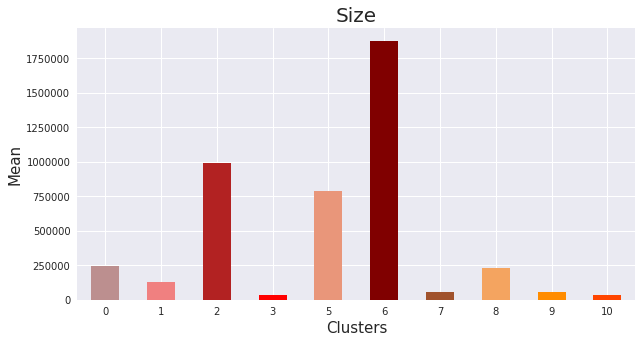

prediction
0      248001
1      128783
2      989554
3       33079
5      785489
6     1876249
7       60134
8      233906
9       54038
10      31227
dtype: int64


In [145]:
df = merged_data.groupby(["prediction"]).size()
df.plot(kind = "bar", figsize = (10,5), rot = 0, color = ['rosybrown', 'lightcoral', 'firebrick', 'red', 'darksalmon',
                                                          'maroon', 'sienna', 'sandybrown', 'darkorange', 'orangered',
                                                          'chocolate', 'orange', 'darkgoldenrod', 'brown', 'saddlebrown',
                                                          'tomato', 'lightsalmon'])
plt.title("Size".capitalize(), size = 20)
plt.xlabel("Clusters", size = 15)
plt.ylabel("Mean", size = 15)
plt.show()
print(df)

In [51]:
cluster_to_drop = 4
merged_data = merged_data[merged_data["prediction"] != 4]

<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Average number of shows viewed per day </b> </h2> </center></font></div>

Text(0, 0.5, 'Number of shows')

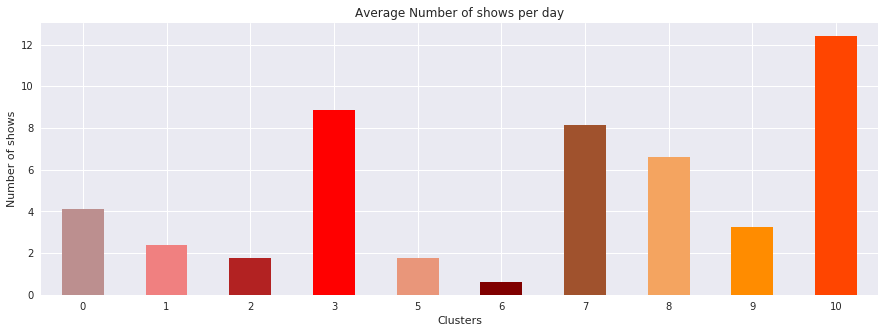

In [151]:
agency_borough = merged_data.groupby(["prediction"]).sum().loc[:,['station_hdtv',
       'station_sdtv', 'station_sports', 'station_tve']]

(agency_borough.sum(axis = 1)/(31*merged_data.groupby(["prediction"]).size())).plot(kind = "bar", rot = 0, color = ['rosybrown', 'lightcoral', 'firebrick', 'red', 'darksalmon',
                                                          'maroon', 'sienna', 'sandybrown', 'darkorange', 'orangered',
                                                          'chocolate', 'orange', 'darkgoldenrod', 'brown', 'saddlebrown',
                                                          'tomato', 'lightsalmon'], figsize=(15,5))
plt.title("Average Number of shows per day")
plt.xlabel("Clusters")
plt.ylabel("Number of shows")



<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Viewing Behaviors </b> </h2> </center></font></div>

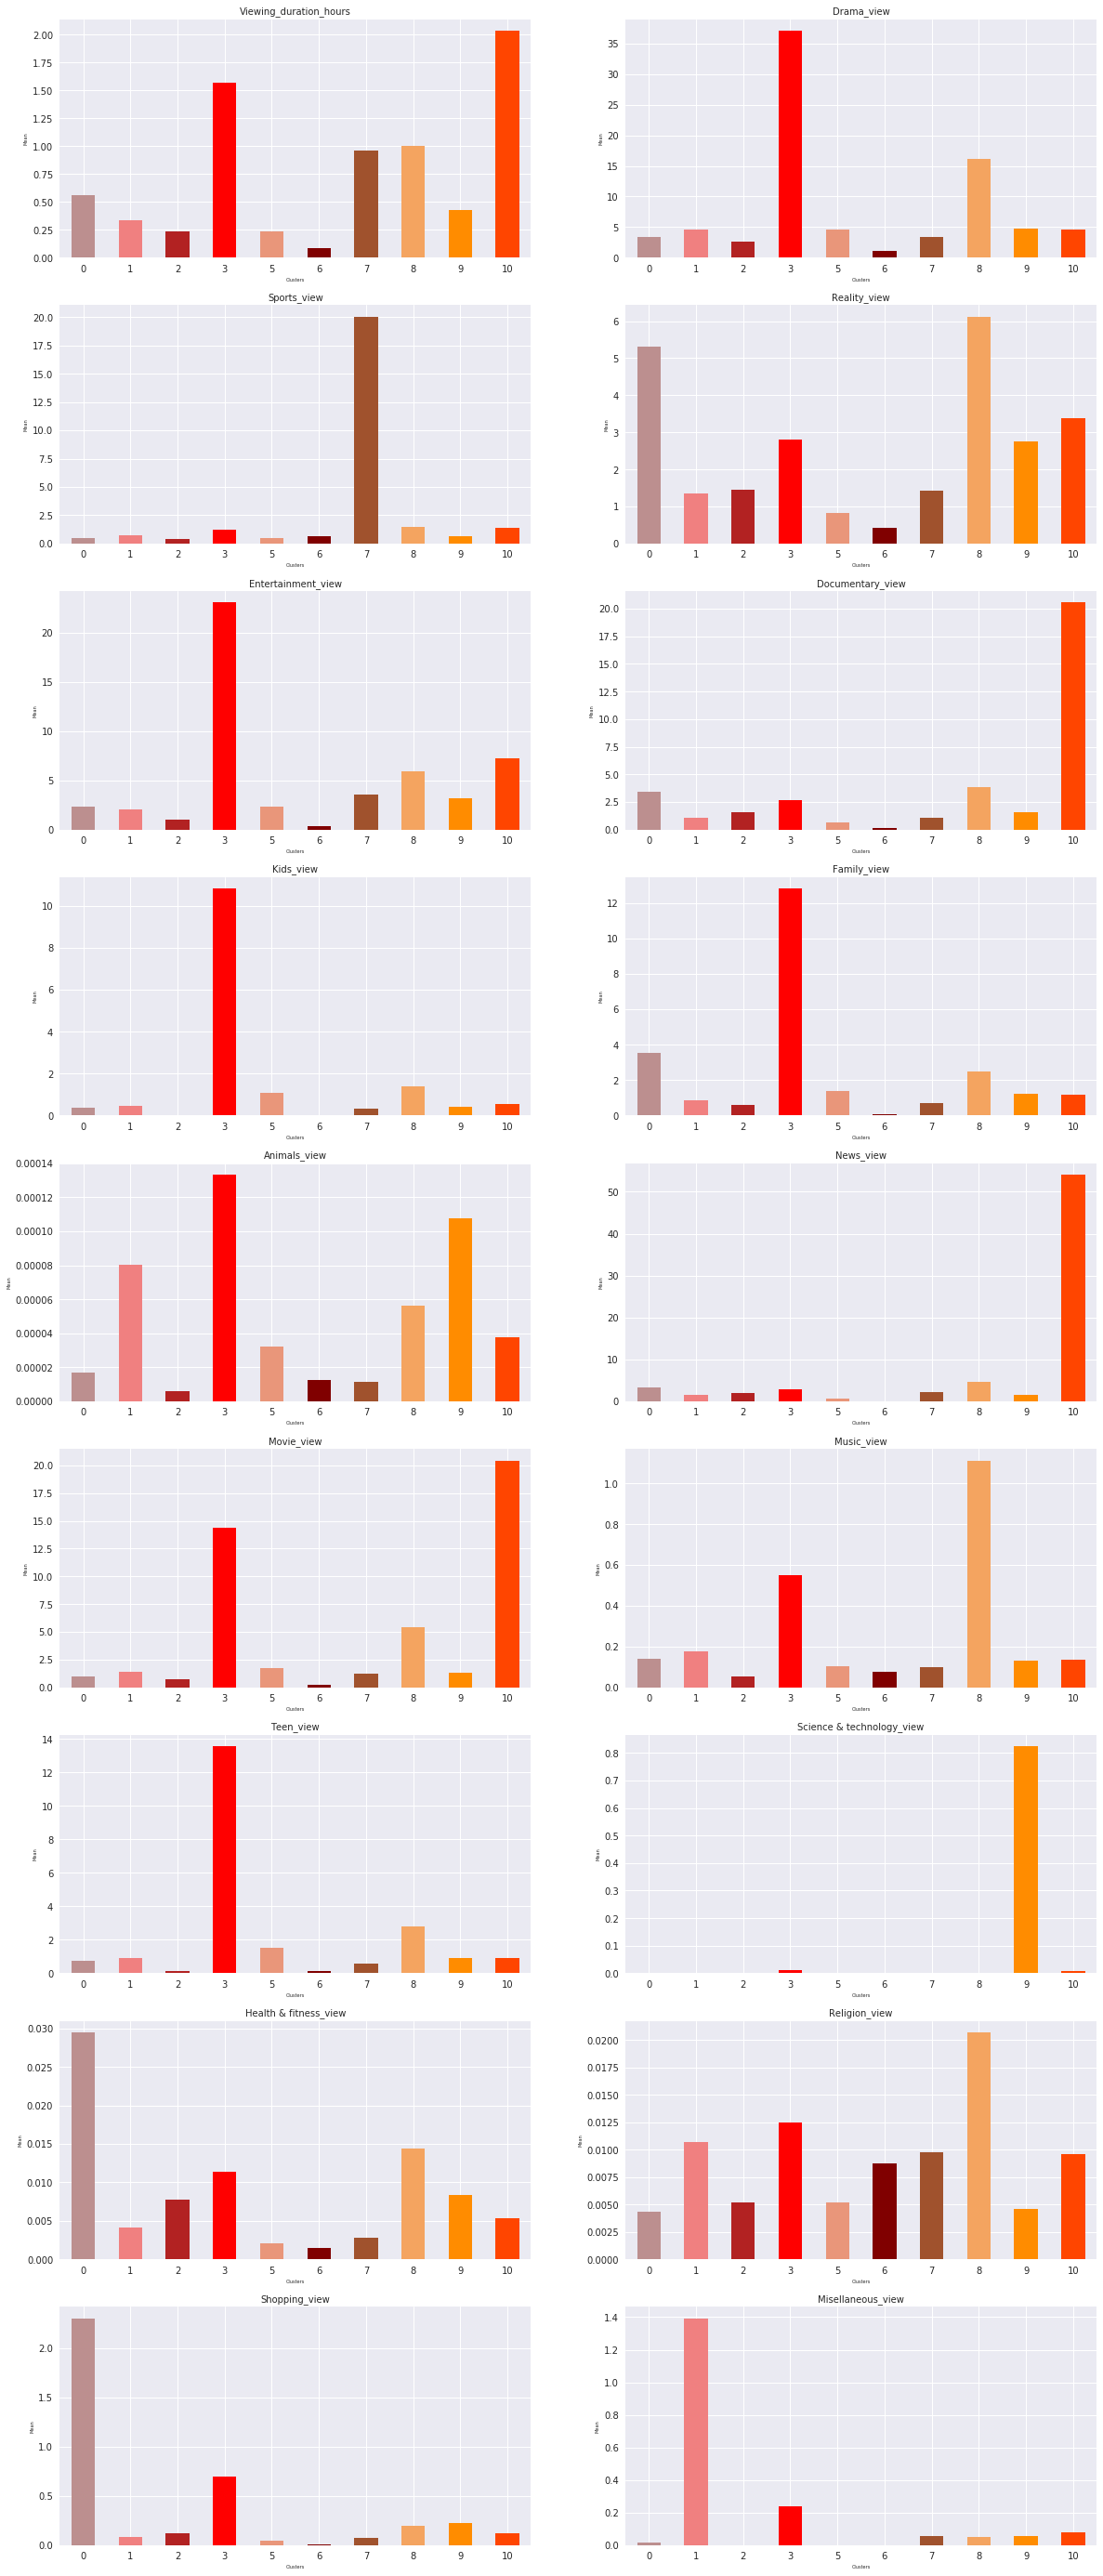

In [154]:
df = merged_data.groupby(["prediction"]).mean()
variables = ['Drama_view', 'Sports_view', 'Reality_view',
       'Entertainment_view', 'Documentary_view', 'Kids_view', 'Family_view',
       'Animals_view', 'News_view', 'Movie_view', 'Music_view', 'Teen_view',
       'Science & Technology_view', 'Health & Fitness_view', 'Religion_view',
       'Shopping_view', 'Misellaneous_view']

COL_NUM = 2
ROW_NUM = 9
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,50))

ax = axes[0, 0]
    
    
(df["viewing_duration_seconds"]/(3600*31)).plot(kind = "bar", rot = 0, color = ['rosybrown', 'lightcoral', 'firebrick', 'red', 'darksalmon',
                                                          'maroon', 'sienna', 'sandybrown', 'darkorange', 'orangered',
                                                          'chocolate', 'orange', 'darkgoldenrod', 'brown', 'saddlebrown',
                                                          'tomato', 'lightsalmon'], ax = ax)
ax.set_title("viewing_duration_hours".capitalize(), size = 10)
ax.set_xlabel("Clusters", size = 5)
ax.set_ylabel("Mean", size = 5)

for i in range(1, len(variables)+1):
    variable = variables[i-1]
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    
    
    (df[variable]/3600).plot(kind = "bar", rot = 0, color = ['rosybrown', 'lightcoral', 'firebrick', 'red', 'darksalmon',
                                                          'maroon', 'sienna', 'sandybrown', 'darkorange', 'orangered',
                                                          'chocolate', 'orange', 'darkgoldenrod', 'brown', 'saddlebrown',
                                                          'tomato', 'lightsalmon'], ax = ax)
    ax.set_title(variable.capitalize(), size = 10)
    ax.set_xlabel("Clusters", size = 5)
    ax.set_ylabel("Mean", size = 5)
    
    fig.savefig('Clusters behavior.png')


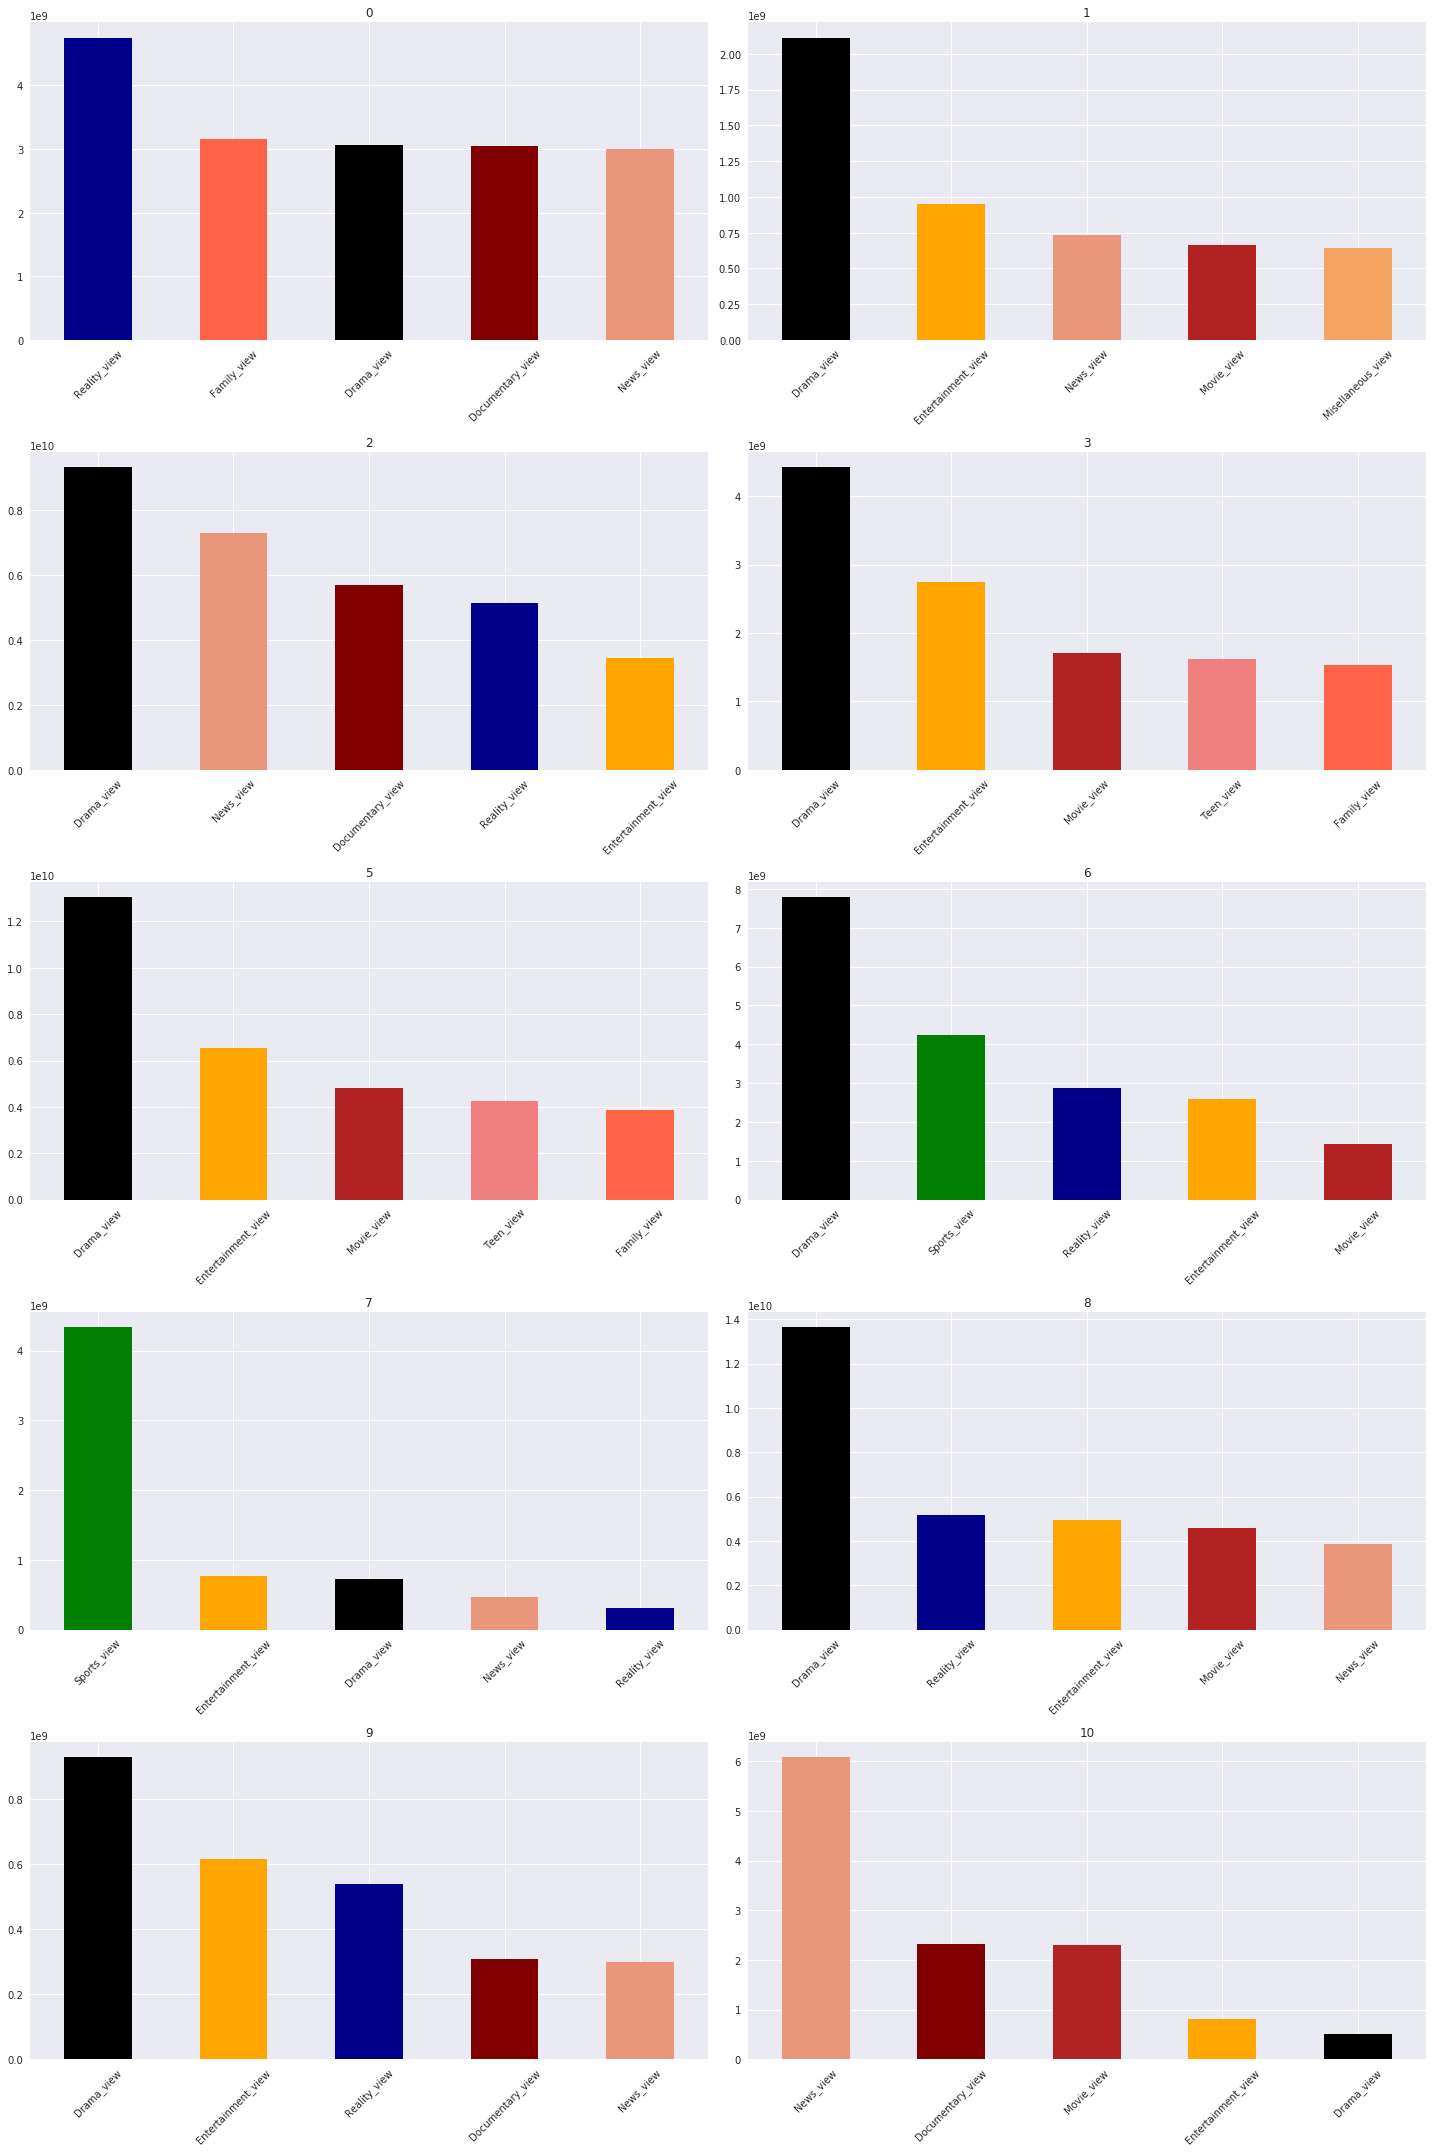

In [122]:
agency_borough = merged_data.groupby(["prediction"]).sum().loc[:,['Drama_view', 'Sports_view', 'Reality_view',
       'Entertainment_view', 'Documentary_view', 'Kids_view', 'Family_view',
       'Animals_view', 'News_view', 'Movie_view', 'Music_view', 'Teen_view',
       'Science & Technology_view', 'Health & Fitness_view', 'Religion_view',
       'Shopping_view', 'Misellaneous_view']].transpose()



dicol = {'Drama_view':'black', 'Sports_view':'green', 'Reality_view':'darkblue',
       'Entertainment_view':"orange", 'Documentary_view':'maroon', 'Kids_view':'darkgoldenrod', 
         'Family_view':'tomato','Animals_view':'lightsalmon', 'News_view':'darksalmon', 
         'Movie_view':'firebrick', 'Music_view':'rosybrown', 'Teen_view':'lightcoral',
       'Science & Technology_view':'brown', 'Health & Fitness_view':'darksalmon', 
         'Religion_view':'orangered','Shopping_view':'sienna', 'Misellaneous_view':"sandybrown"}


COL_NUM = 2
ROW_NUM = 5
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,30))

for i, (borough, agency_count) in enumerate(agency_borough.items()):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    agency_count = agency_count.sort_values(ascending=False)[:5] 
    colors = [dicol[i] for i in agency_count.keys()]
    agency_count.plot(kind='bar', ax=ax, rot = 45, color = colors)
    ax.set_title(borough)

# FYI - plt.tight_layout()
plt.tight_layout()

<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Age </b> </h2> </center></font></div>

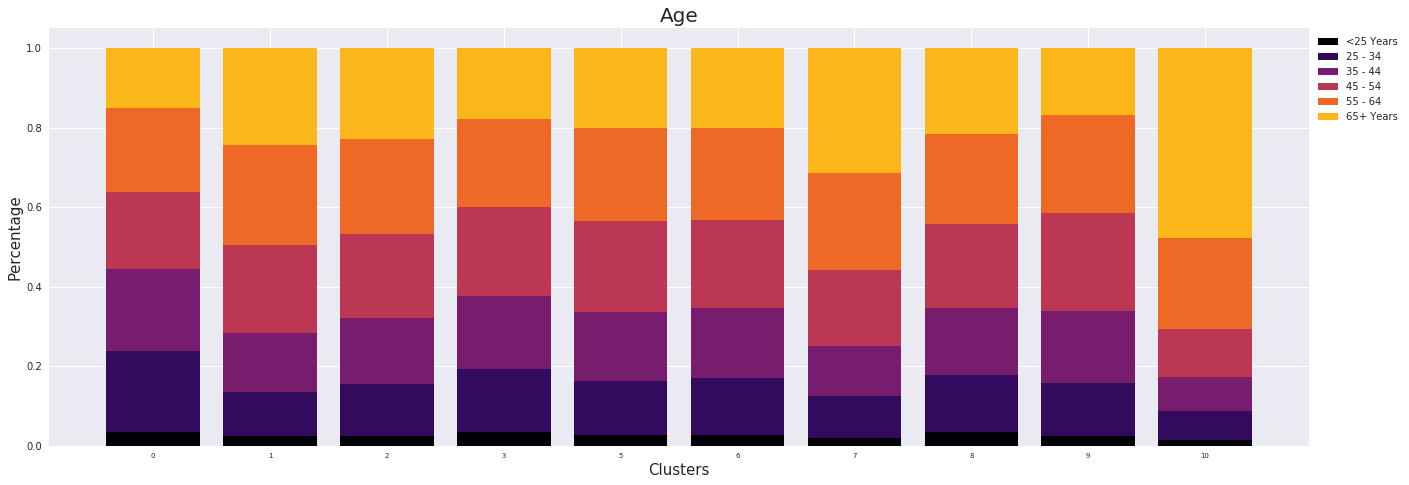

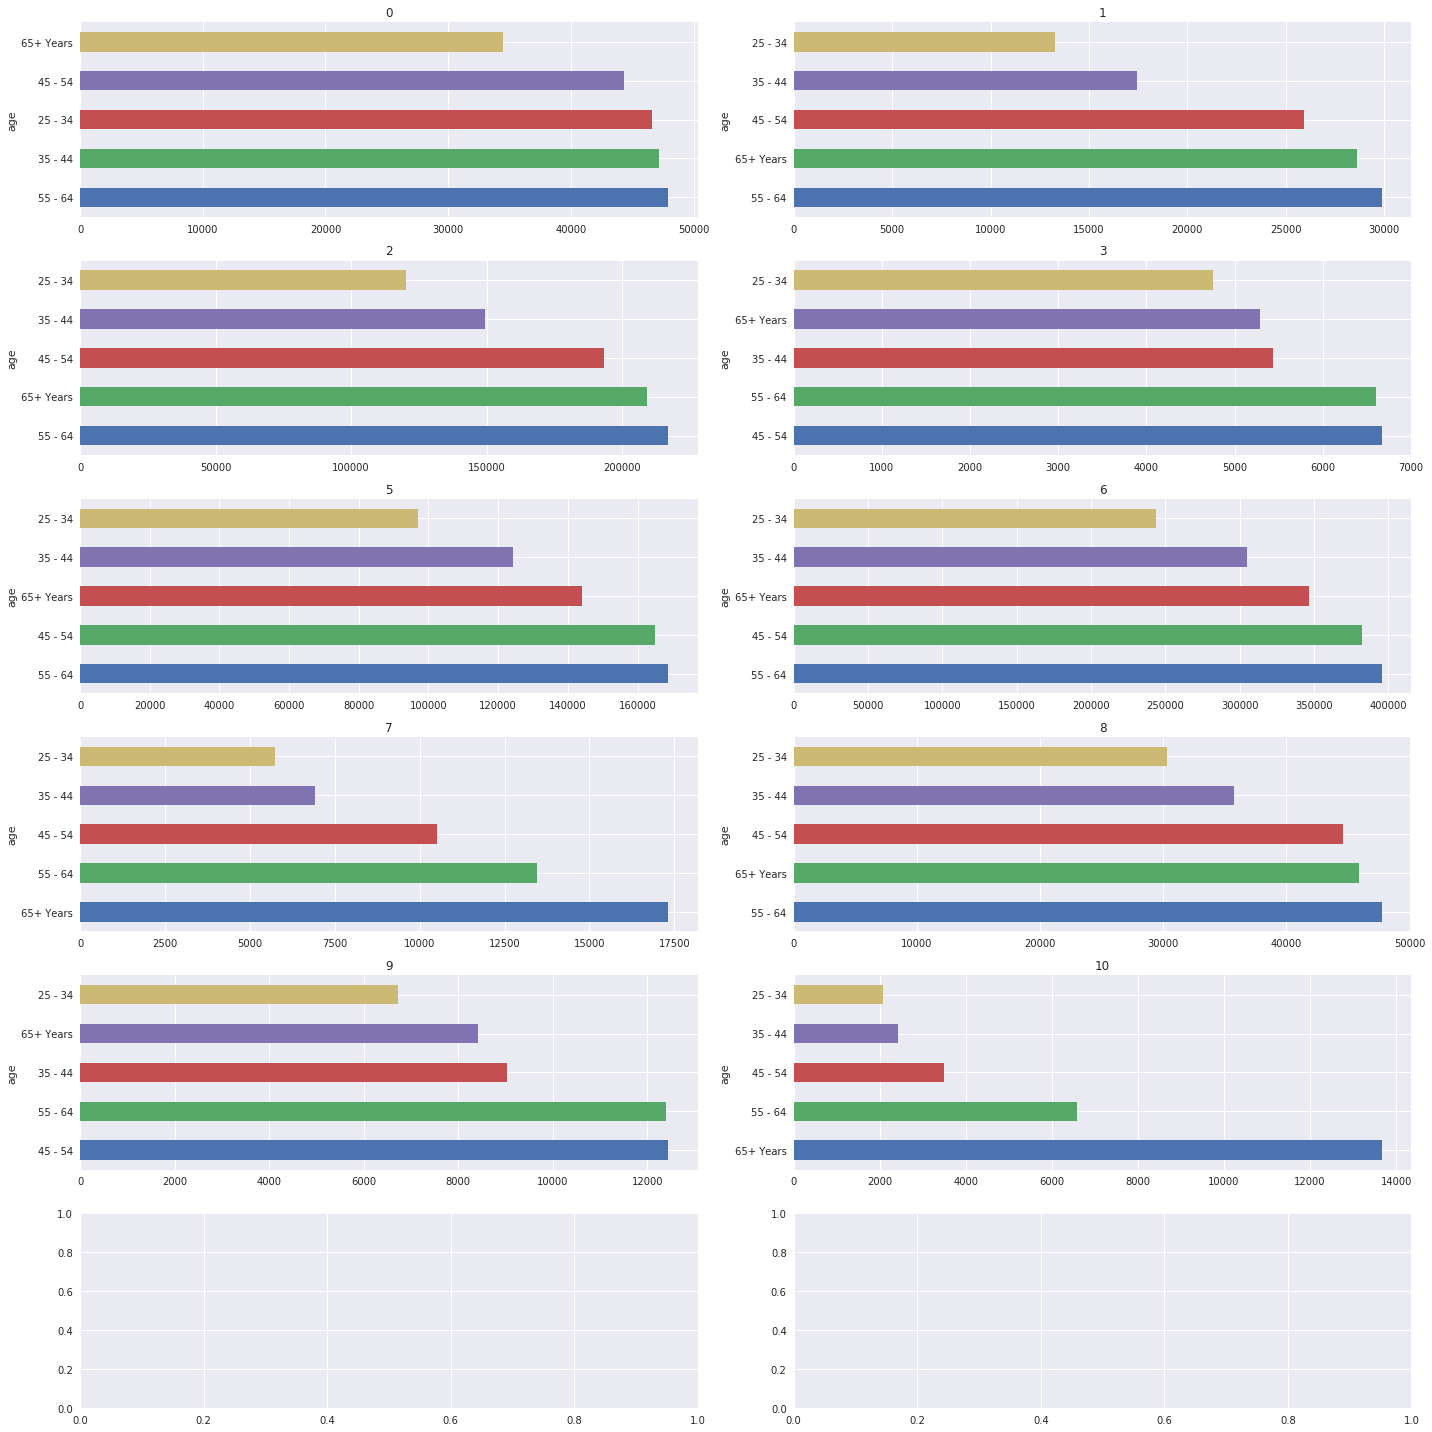

In [54]:
variable = "age"

df = merged_data.groupby(["prediction", variable]).size().unstack()
degList = [i for i in df.columns]
degList = [degList[-1]] + degList[:-1]

bar_l = range(10)

cm = plt.get_cmap('inferno')

f, ax = plt.subplots(1, figsize=(20,10))
ax.set_prop_cycle(cycler('color',[cm(1.*i/len(degList)) for i in range(len(degList))]))

bottom = np.zeros_like(bar_l).astype('float')
for i, deg in enumerate(degList):
    ax.bar(bar_l, df[deg]/df.sum(axis = 1), bottom = bottom, width=0.8, label=deg)
    bottom += df[deg].values/df.sum(axis = 1).values


ax.set_xticks(bar_l)
ax.set_xticklabels(df.index.values, size='x-small')
ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=1)
f.subplots_adjust(right=1, bottom=0.3)
plt.title(variable.capitalize(), size = 20)
plt.xlabel("Clusters", size = 15)
plt.ylabel("Percentage", size = 15)
f.show()

agency_borough = merged_data.groupby([variable, "prediction"]).size().unstack()
#We'll arrange the subplots in three rows and two columns. 
#Since we have only 5 boroughs, one plot will be blank
COL_NUM = 2
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))

for i, (borough, agency_count) in enumerate(agency_borough.items()):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    agency_count = agency_count.sort_values(ascending=False)[:5] 
    agency_count.plot(kind='barh', ax=ax)
    ax.set_title(borough)

# FYI - plt.tight_layout()
plt.tight_layout()

<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Gender </b> </h2> </center></font></div>

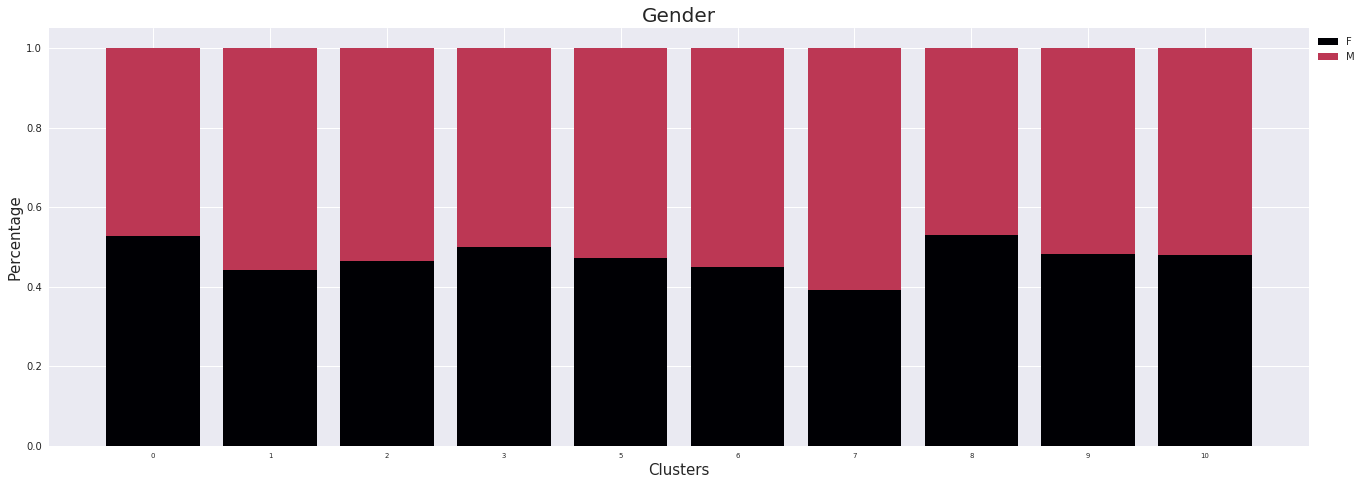

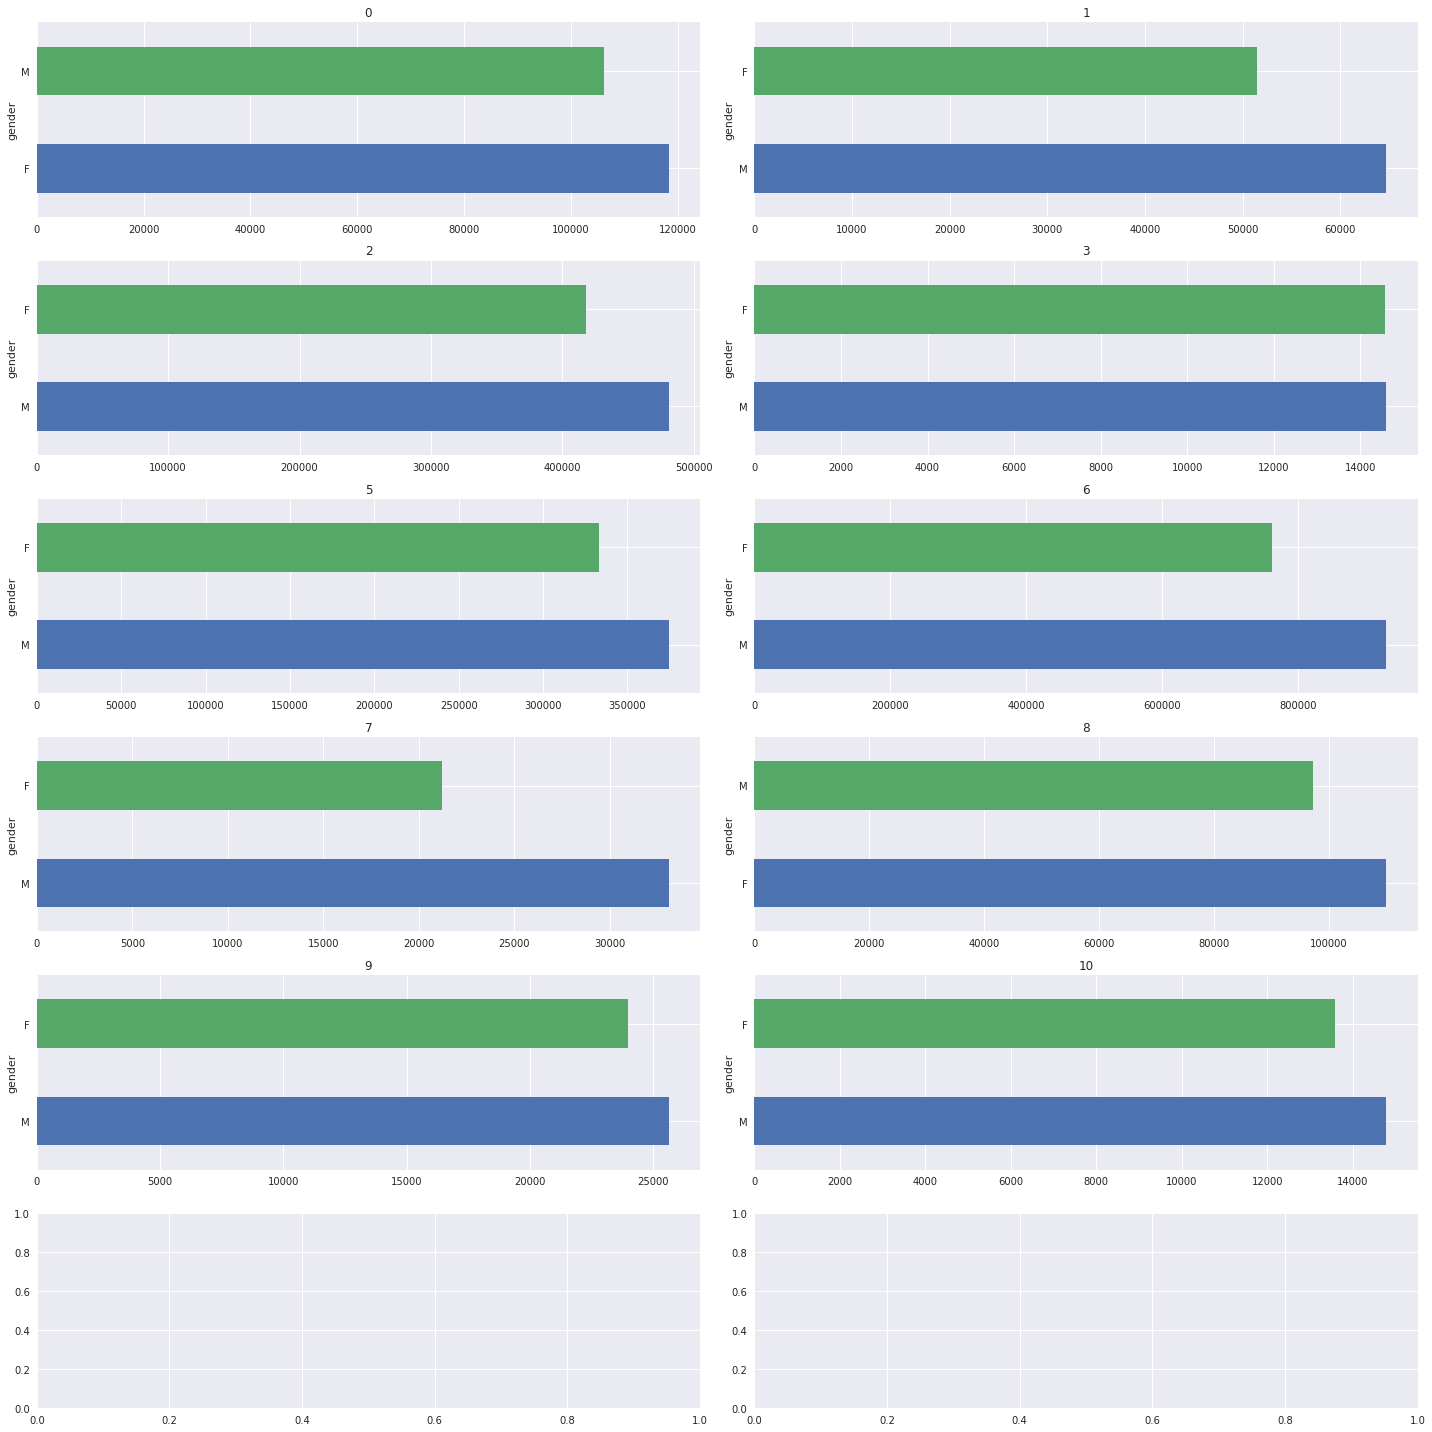

In [55]:
variable = "gender"
df = merged_data.groupby(["prediction", variable]).size().unstack()
degList = [i for i in df.columns]

bar_l = range(10)

cm = plt.get_cmap('inferno')

f, ax = plt.subplots(1, figsize=(20,10))
ax.set_prop_cycle(cycler('color',[cm(1.*i/len(degList)) for i in range(len(degList))]))

bottom = np.zeros_like(bar_l).astype('float')
for i, deg in enumerate(degList):
    ax.bar(bar_l, df[deg]/df.sum(axis = 1), bottom = bottom, width=0.8, label=deg)
    bottom += df[deg].values/df.sum(axis = 1).values


ax.set_xticks(bar_l)
ax.set_xticklabels(df.index.values, size='x-small')
ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=1)
f.subplots_adjust(right=1, bottom=0.3)
plt.title(variable.capitalize(), size = 20)
plt.xlabel("Clusters", size = 15)
plt.ylabel("Percentage", size = 15)
f.show()

agency_borough = merged_data.groupby([variable, "prediction"]).size().unstack()
#We'll arrange the subplots in three rows and two columns. 
#Since we have only 5 boroughs, one plot will be blank
COL_NUM = 2
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))

for i, (borough, agency_count) in enumerate(agency_borough.items()):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    agency_count = agency_count.sort_values(ascending=False)[:5] 
    agency_count.plot(kind='barh', ax=ax)
    ax.set_title(borough)

# FYI - plt.tight_layout()
plt.tight_layout()


<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Child presence </b> </h2> </center></font></div>

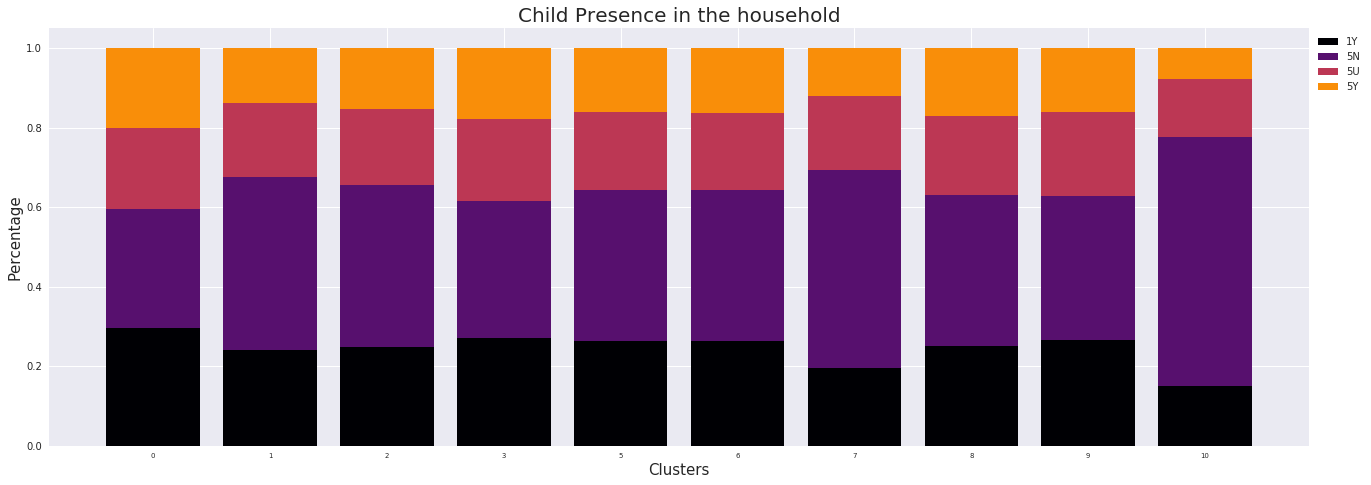

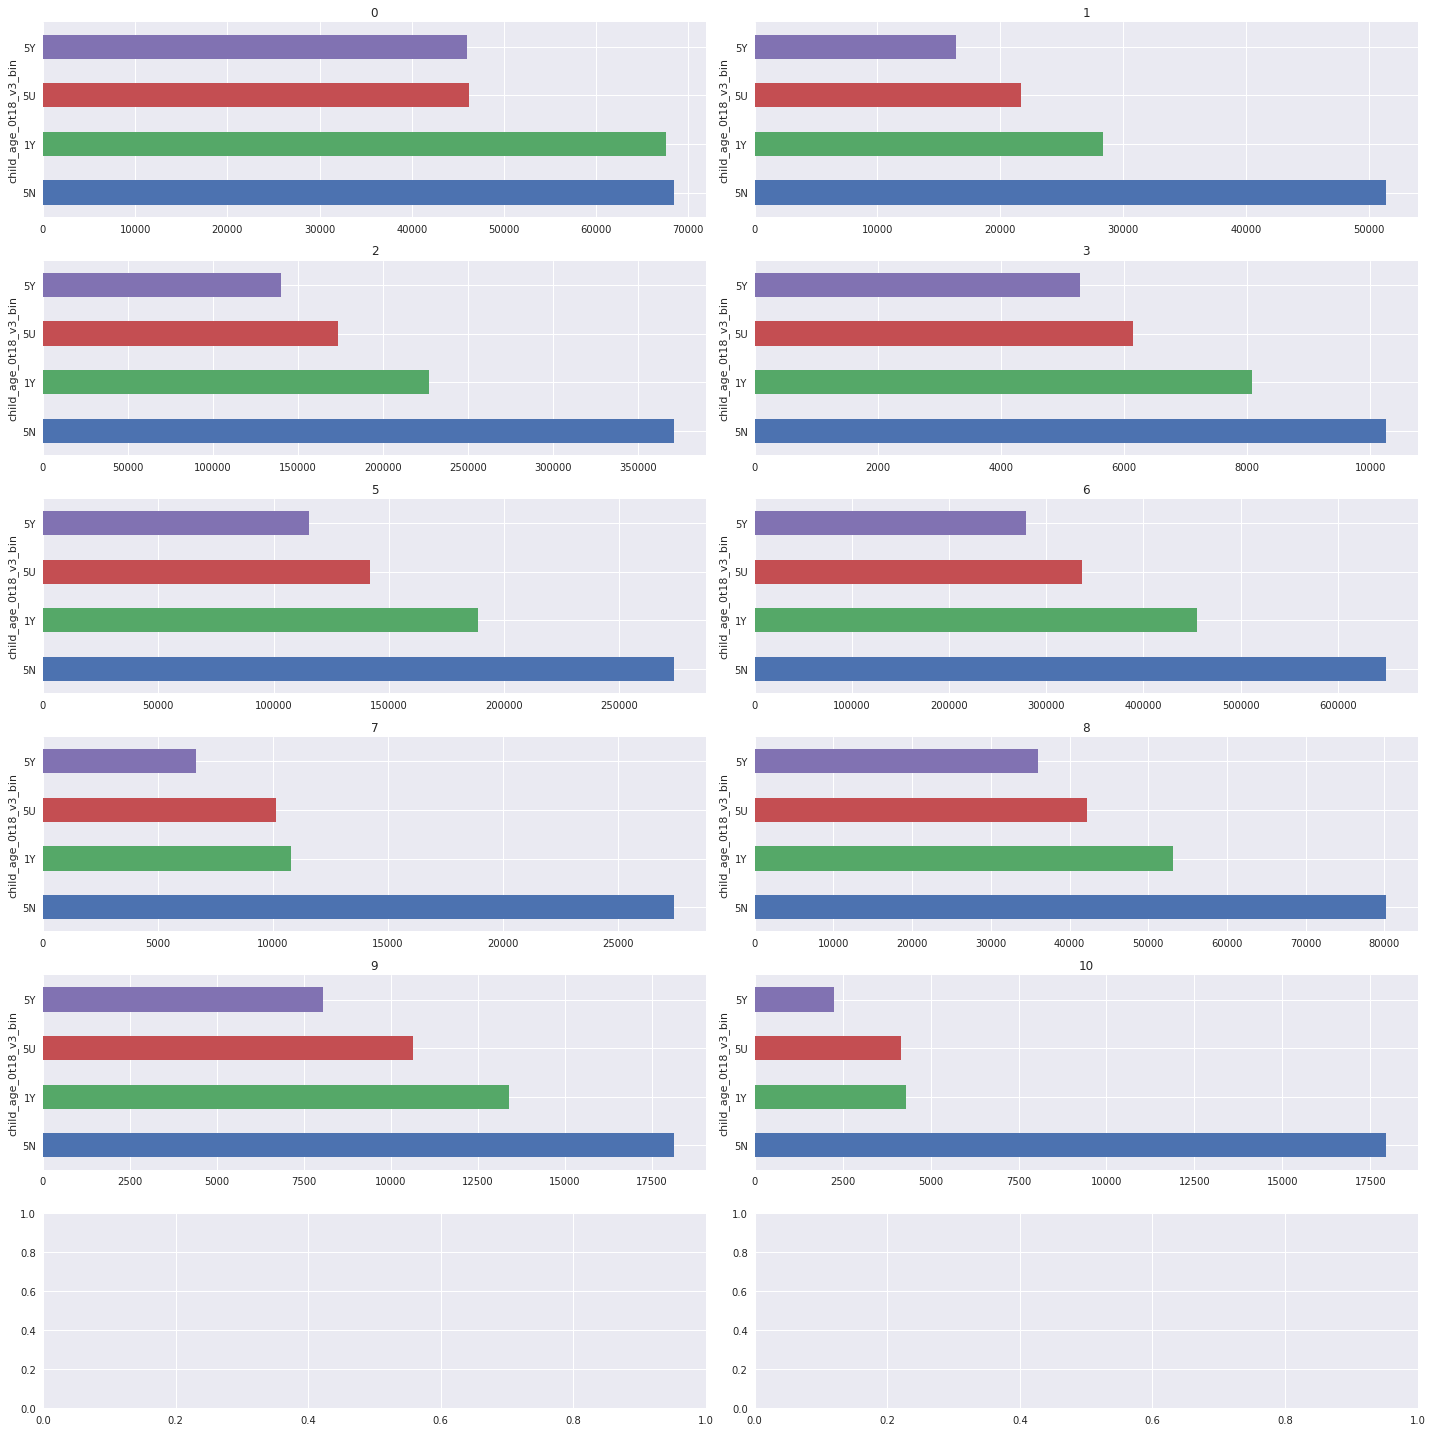

In [56]:
variable = "child_age_0t18_v3_bin"
df = merged_data.groupby(["prediction", variable]).size().unstack()
degList = [i for i in df.columns]

bar_l = range(10)

cm = plt.get_cmap('inferno')

f, ax = plt.subplots(1, figsize=(20,10))
ax.set_prop_cycle(cycler('color',[cm(1.*i/len(degList)) for i in range(len(degList))]))

bottom = np.zeros_like(bar_l).astype('float')
for i, deg in enumerate(degList):
    ax.bar(bar_l, df[deg]/df.sum(axis = 1), bottom = bottom, width=0.8, label=deg)
    bottom += df[deg].values/df.sum(axis = 1).values


ax.set_xticks(bar_l)
ax.set_xticklabels(df.index.values, size='x-small')
ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=1)
f.subplots_adjust(right=1, bottom=0.3)
plt.title("Child Presence in the household", size = 20)
plt.xlabel("Clusters", size = 15)
plt.ylabel("Percentage", size = 15)
f.show()

agency_borough = merged_data.groupby([variable, "prediction"]).size().unstack()
#We'll arrange the subplots in three rows and two columns. 
#Since we have only 5 boroughs, one plot will be blank
COL_NUM = 2
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))

for i, (borough, agency_count) in enumerate(agency_borough.items()):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    agency_count = agency_count.sort_values(ascending=False)[:5] 
    agency_count.plot(kind='barh', ax=ax)
    ax.set_title(borough)

# FYI - plt.tight_layout()
plt.tight_layout()



<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Cinemax service </b> </h2> </center></font></div>

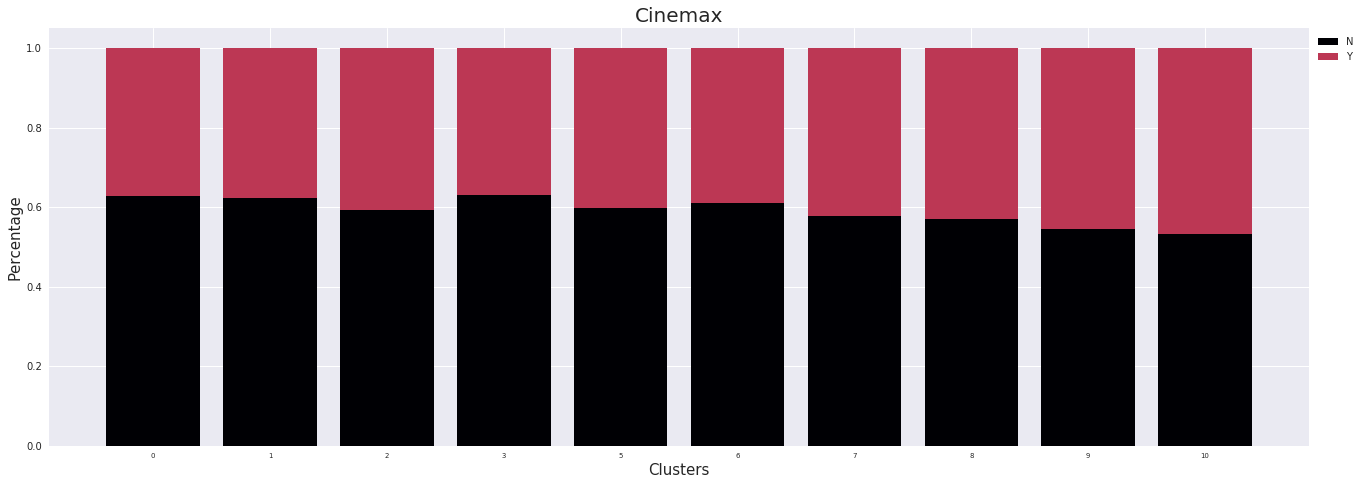

In [155]:
variable = "cinemax"
df = merged_data.groupby(["prediction", variable]).size().unstack()
degList = [i for i in df.columns]

bar_l = range(10)

cm = plt.get_cmap('inferno')

f, ax = plt.subplots(1, figsize=(20,10))
ax.set_prop_cycle(cycler('color',[cm(1.*i/len(degList)) for i in range(len(degList))]))

bottom = np.zeros_like(bar_l).astype('float')
for i, deg in enumerate(degList):
    ax.bar(bar_l, df[deg]/df.sum(axis = 1), bottom = bottom, width=0.8, label=deg)
    bottom += df[deg].values/df.sum(axis = 1).values


ax.set_xticks(bar_l)
ax.set_xticklabels(df.index.values, size='x-small')
ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=1)
f.subplots_adjust(right=1, bottom=0.3)
plt.title(variable.capitalize(), size = 20)
plt.xlabel("Clusters", size = 15)
plt.ylabel("Percentage", size = 15)
f.show()


<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Sports service </b> </h2> </center></font></div>

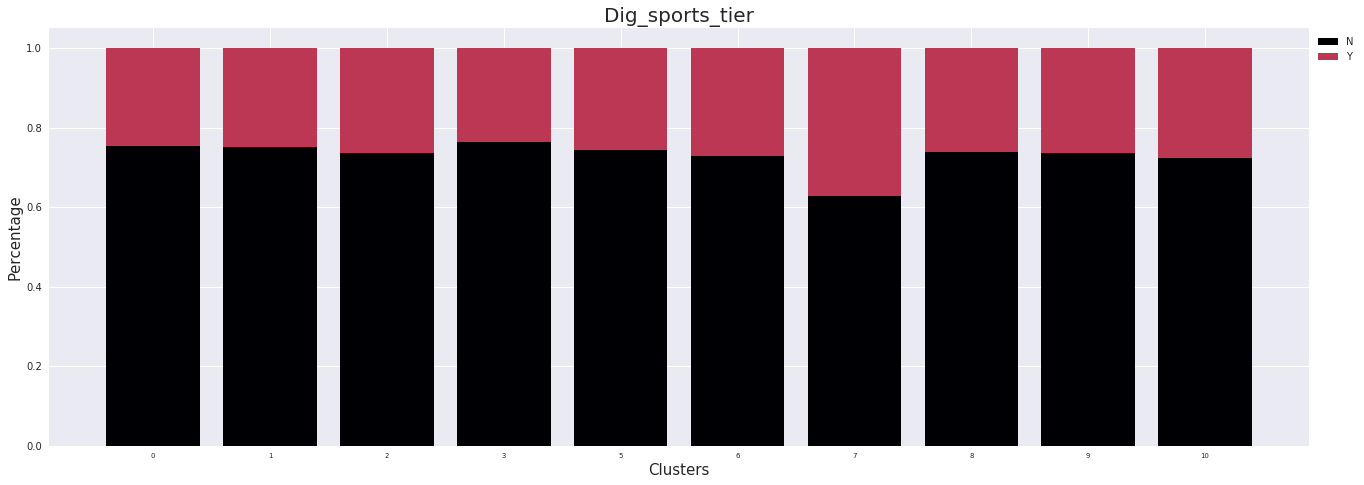

In [156]:
variable = "dig_sports_tier"
df = merged_data.groupby(["prediction", variable]).size().unstack()
degList = [i for i in df.columns]

bar_l = range(10)

cm = plt.get_cmap('inferno')

f, ax = plt.subplots(1, figsize=(20,10))
ax.set_prop_cycle(cycler('color',[cm(1.*i/len(degList)) for i in range(len(degList))]))

bottom = np.zeros_like(bar_l).astype('float')
for i, deg in enumerate(degList):
    ax.bar(bar_l, df[deg]/df.sum(axis = 1), bottom = bottom, width=0.8, label=deg)
    bottom += df[deg].values/df.sum(axis = 1).values


ax.set_xticks(bar_l)
ax.set_xticklabels(df.index.values, size='x-small')
ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=1)
f.subplots_adjust(right=1, bottom=0.3)
plt.title(variable.capitalize(), size = 20)
plt.xlabel("Clusters", size = 15)
plt.ylabel("Percentage", size = 15)
f.show()


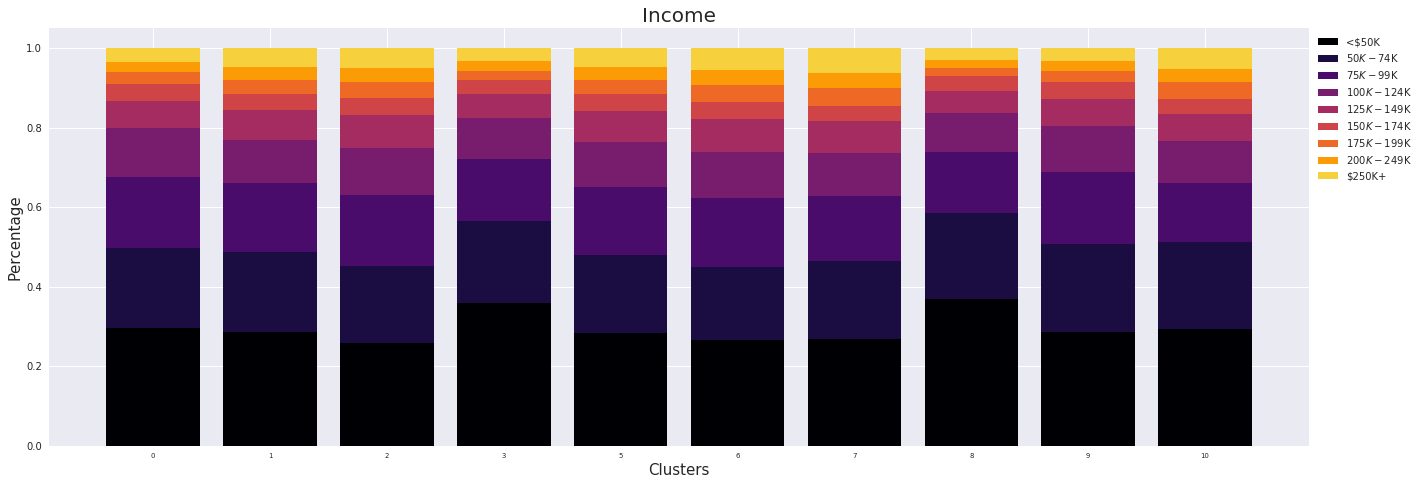

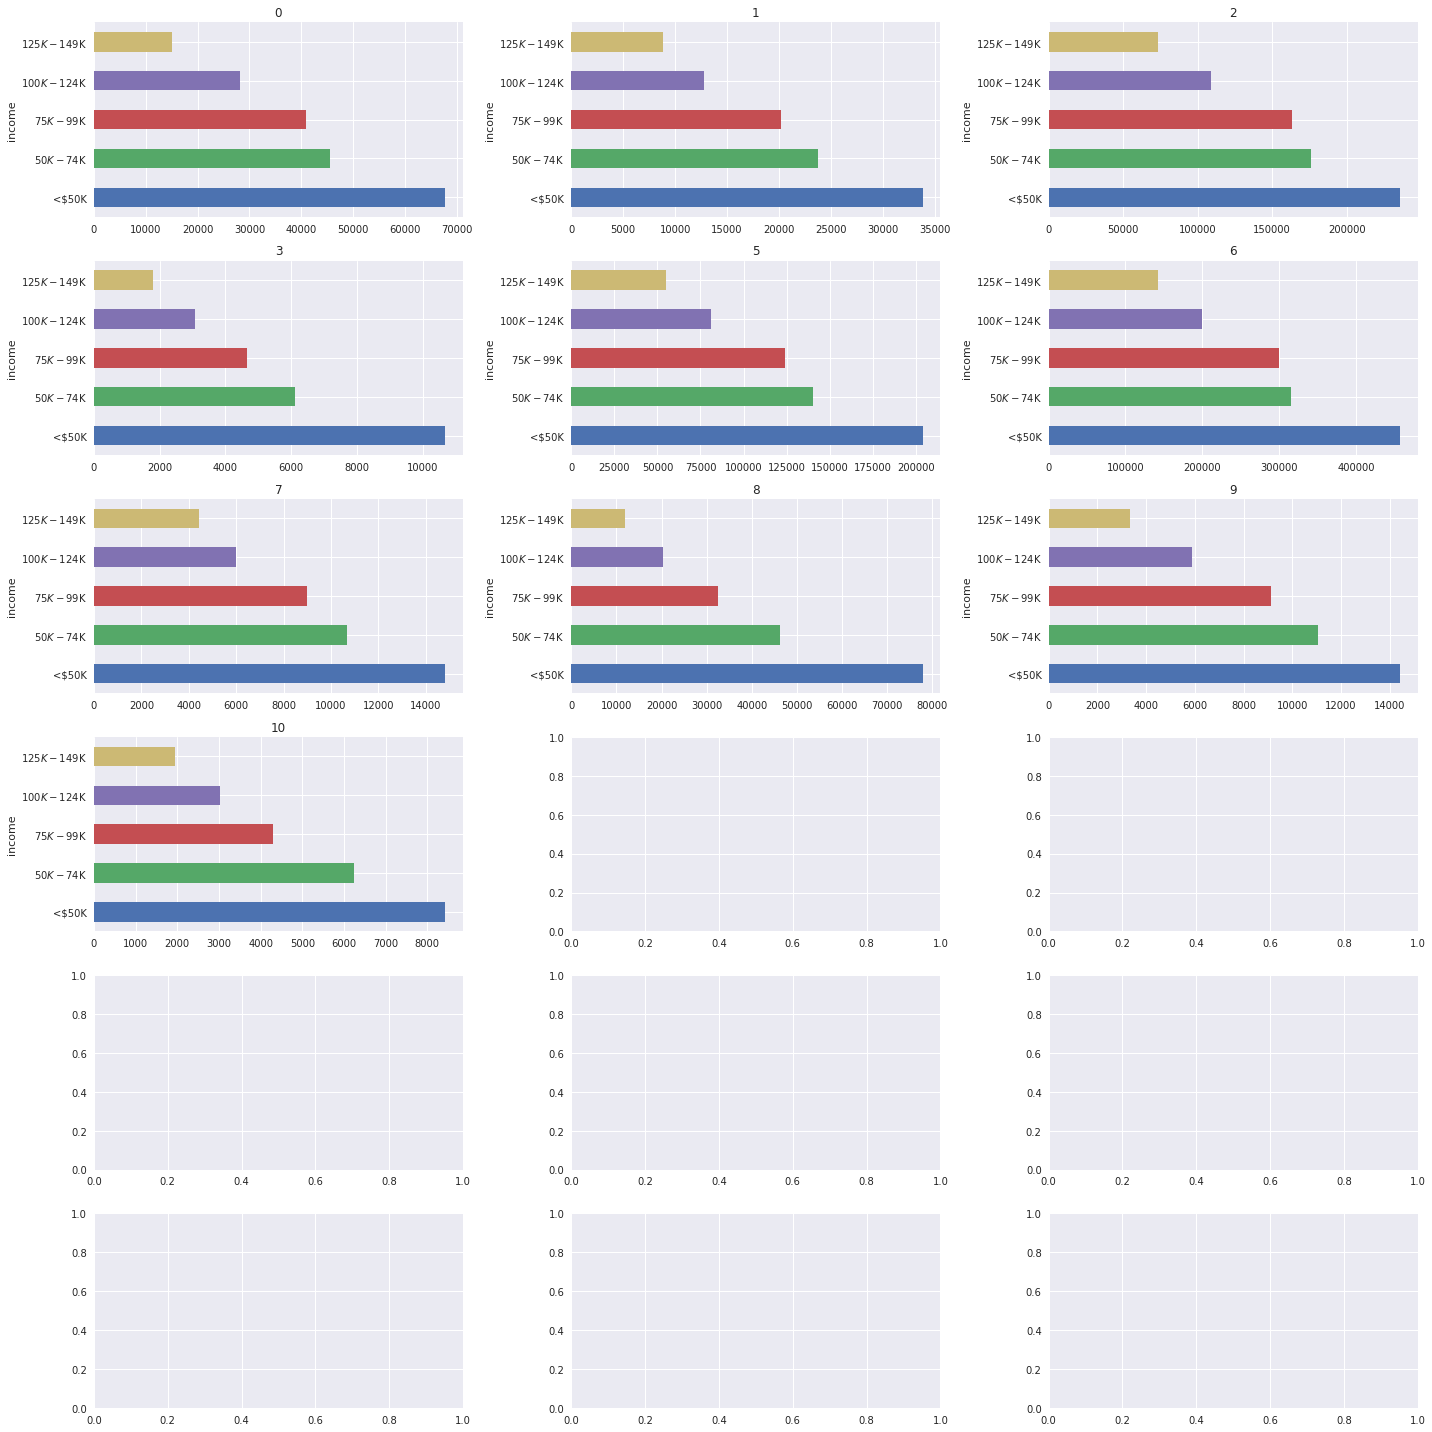

In [60]:
variable = "income"
df = merged_data.groupby(["prediction", variable]).size().unstack()
degList = ['<$50K','$50K - $74K', '$75K - $99K', '$100K - $124K', '$125K - $149K', '$150K - $174K', '$175K - $199K', '$200K - $249K', '$250K+']

bar_l = range(10)

cm = plt.get_cmap('inferno')

f, ax = plt.subplots(1, figsize=(20,10))
ax.set_prop_cycle(cycler('color',[cm(1.*i/len(degList)) for i in range(len(degList))]))

bottom = np.zeros_like(bar_l).astype('float')
for i, deg in enumerate(degList):
    ax.bar(bar_l, df[deg]/df.sum(axis = 1), bottom = bottom, width=0.8, label=deg)
    bottom += df[deg].values/df.sum(axis = 1).values


ax.set_xticks(bar_l)
ax.set_xticklabels(df.index.values, size='x-small')
ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=1)
f.subplots_adjust(right=1, bottom=0.3)
plt.title(variable.capitalize(), size = 20)
plt.xlabel("Clusters", size = 15)
plt.ylabel("Percentage", size = 15)
f.show()

agency_borough = merged_data.groupby([variable, "prediction"]).size().unstack()
#We'll arrange the subplots in three rows and two columns. 
#Since we have only 5 boroughs, one plot will be blank
COL_NUM = 3
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))

for i, (borough, agency_count) in enumerate(agency_borough.items()):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    agency_count = agency_count.sort_values(ascending=False)[:5] 
    agency_count.plot(kind='barh', ax=ax)
    ax.set_title(borough)

# FYI - plt.tight_layout()
plt.tight_layout()



<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Number of people living in the household </b> </h2> </center></font></div>

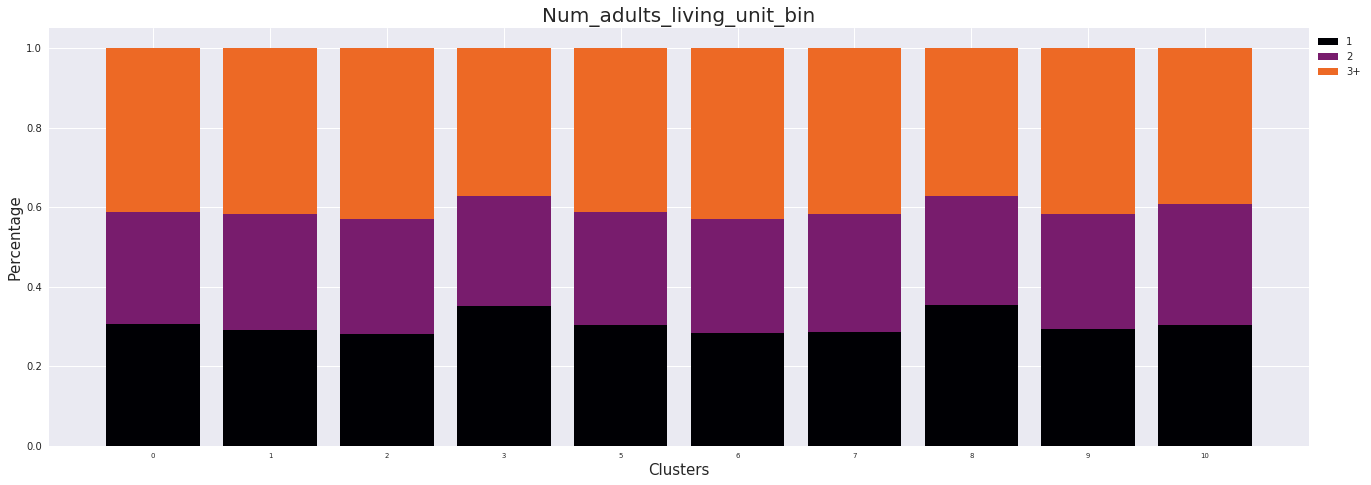

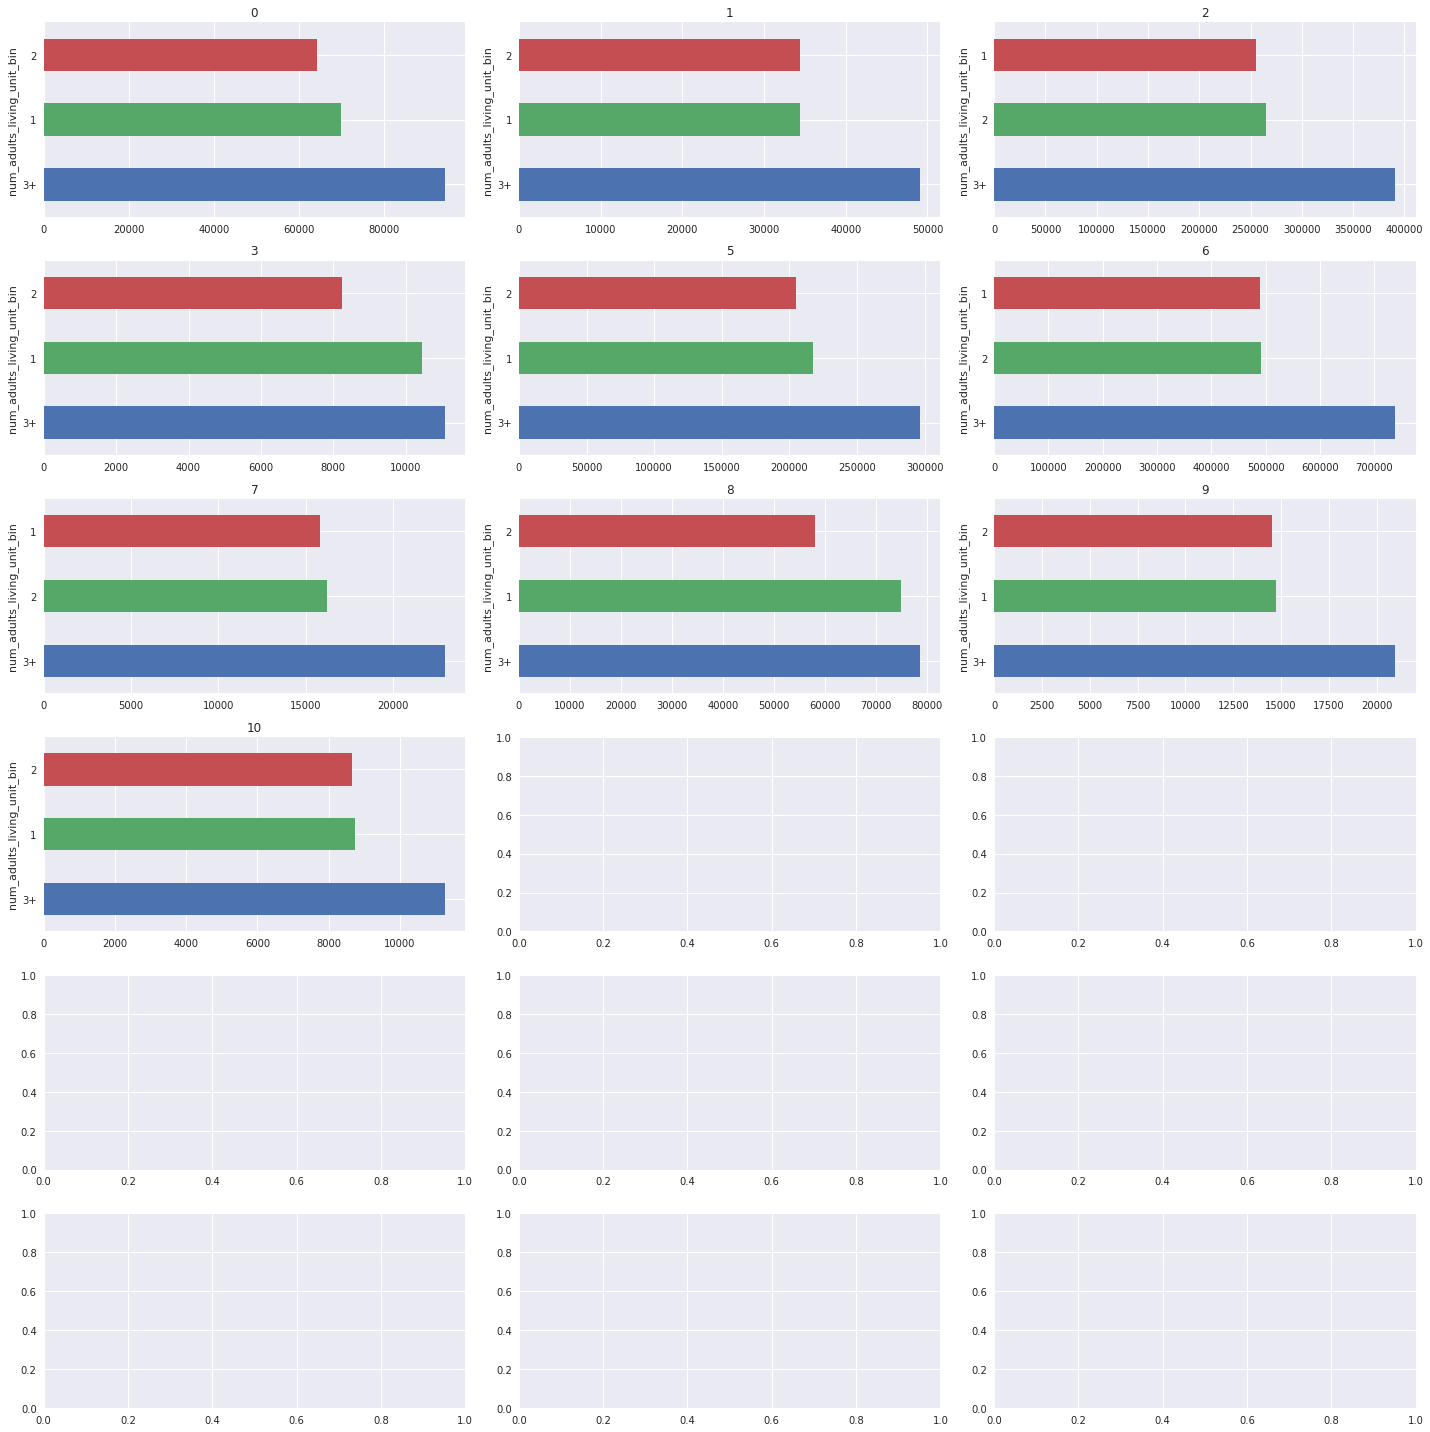

In [168]:
variable = "num_adults_living_unit_bin"
df = merged_data.groupby(["prediction", variable]).size().unstack()
degList = [i for i in df.columns]

bar_l = range(10)

cm = plt.get_cmap('inferno')

f, ax = plt.subplots(1, figsize=(20,10))
ax.set_prop_cycle(cycler('color',[cm(1.*i/len(degList)) for i in range(len(degList))]))

bottom = np.zeros_like(bar_l).astype('float')
for i, deg in enumerate(degList):
    ax.bar(bar_l, df[deg]/df.sum(axis = 1), bottom = bottom, width=0.8, label=deg)
    bottom += df[deg].values/df.sum(axis = 1).values


ax.set_xticks(bar_l)
ax.set_xticklabels(df.index.values, size='x-small')
ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=1)
f.subplots_adjust(right=1, bottom=0.3)
plt.title(variable.capitalize(), size = 20)
plt.xlabel("Clusters", size = 15)
plt.ylabel("Percentage", size = 15)
f.show()

agency_borough = merged_data.groupby([variable, "prediction"]).size().unstack()
#We'll arrange the subplots in three rows and two columns. 
#Since we have only 5 boroughs, one plot will be blank
COL_NUM = 3
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))

for i, (borough, agency_count) in enumerate(agency_borough.items()):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    agency_count = agency_count.sort_values(ascending=False)[:5] 
    agency_count.plot(kind='barh', ax=ax)
    ax.set_title(borough)

# FYI - plt.tight_layout()
plt.tight_layout()



<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Wealth </b> </h2> </center></font></div>

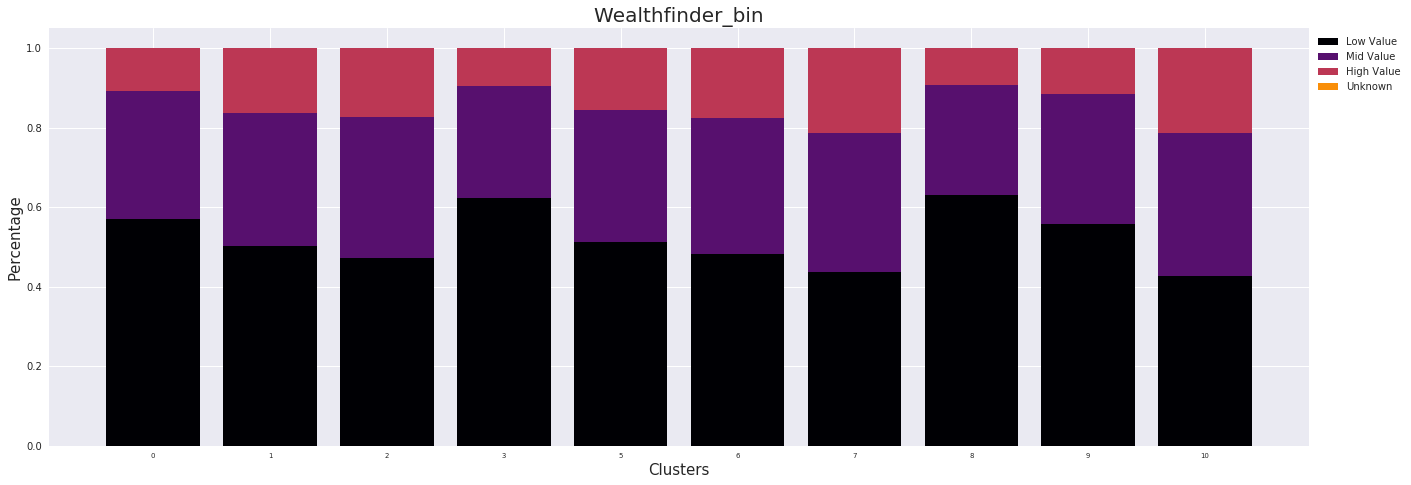

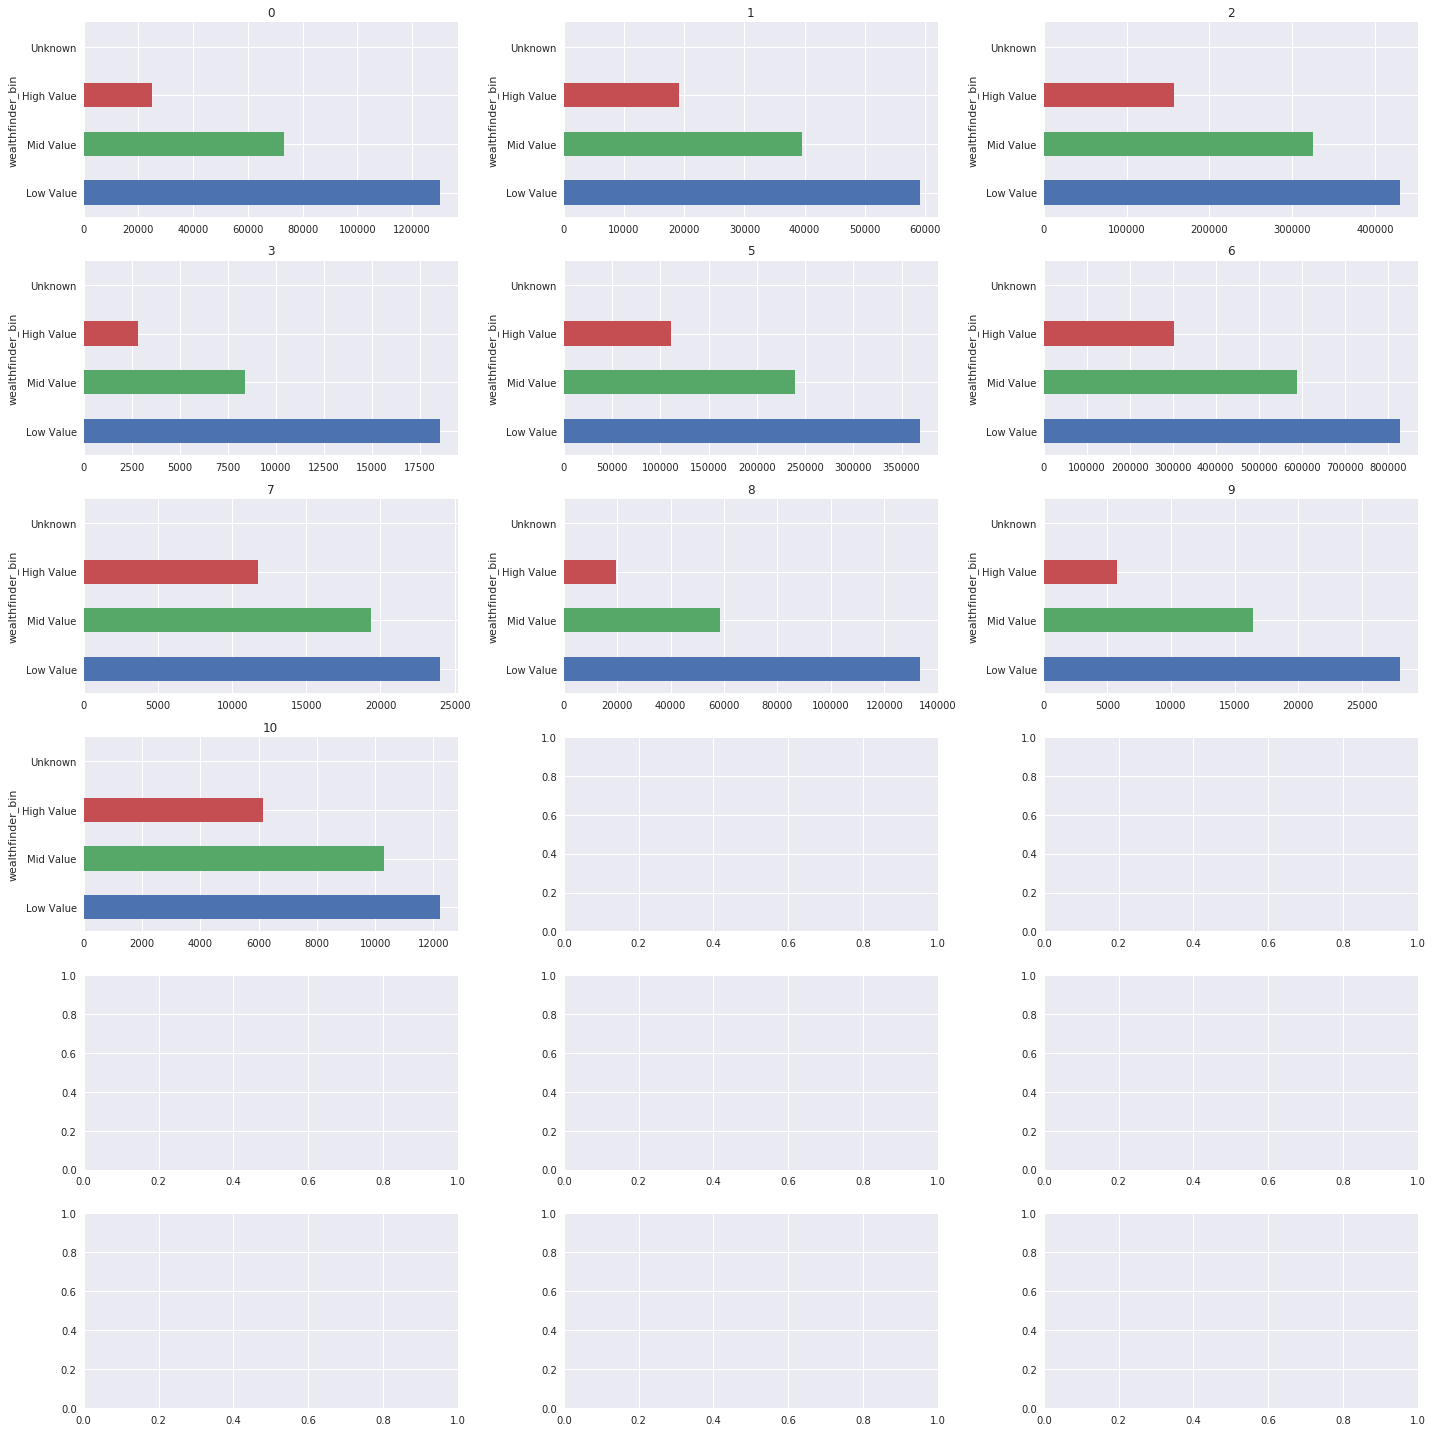

In [106]:
variable = "wealthfinder_bin"
df = merged_data.groupby(["prediction", variable]).size().unstack()
degList = [i for i in df.columns]
degList = ["Low Value", "Mid Value", "High Value", "Unknown"]

bar_l = range(10)

cm = plt.get_cmap('inferno')

f, ax = plt.subplots(1, figsize=(20,10))
ax.set_prop_cycle(cycler('color',[cm(1.*i/len(degList)) for i in range(len(degList))]))

bottom = np.zeros_like(bar_l).astype('float')
for i, deg in enumerate(degList):
    ax.bar(bar_l, df[deg]/df.sum(axis = 1), bottom = bottom, width=0.8, label=deg)
    bottom += df[deg].values/df.sum(axis = 1).values


ax.set_xticks(bar_l)
ax.set_xticklabels(df.index.values, size='x-small')
ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=1)
f.subplots_adjust(right=1, bottom=0.3)
plt.title(variable.capitalize(), size = 20)
plt.xlabel("Clusters", size = 15)
plt.ylabel("Percentage", size = 15)
f.show()

agency_borough = merged_data.groupby([variable, "prediction"]).size().unstack()
#We'll arrange the subplots in three rows and two columns. 
#Since we have only 5 boroughs, one plot will be blank
COL_NUM = 3
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))

for i, (borough, agency_count) in enumerate(agency_borough.items()):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    agency_count = agency_count.sort_values(ascending=False)[:5] 
    agency_count.plot(kind='barh', ax=ax)
    ax.set_title(borough)

# FYI - plt.tight_layout()
plt.tight_layout()



<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Showtime service </b> </h2> </center></font></div>

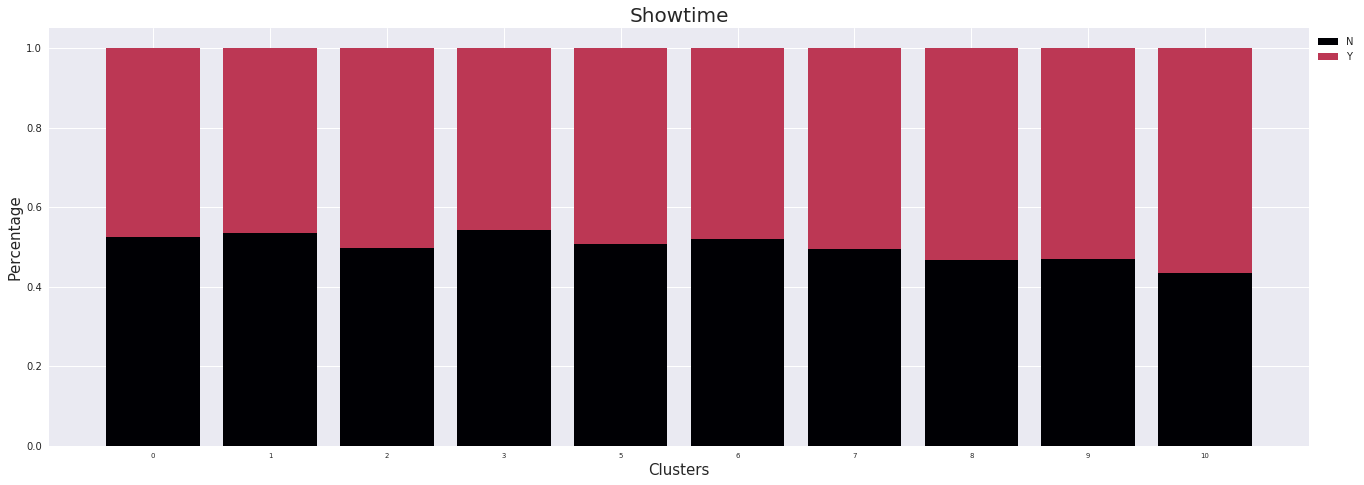

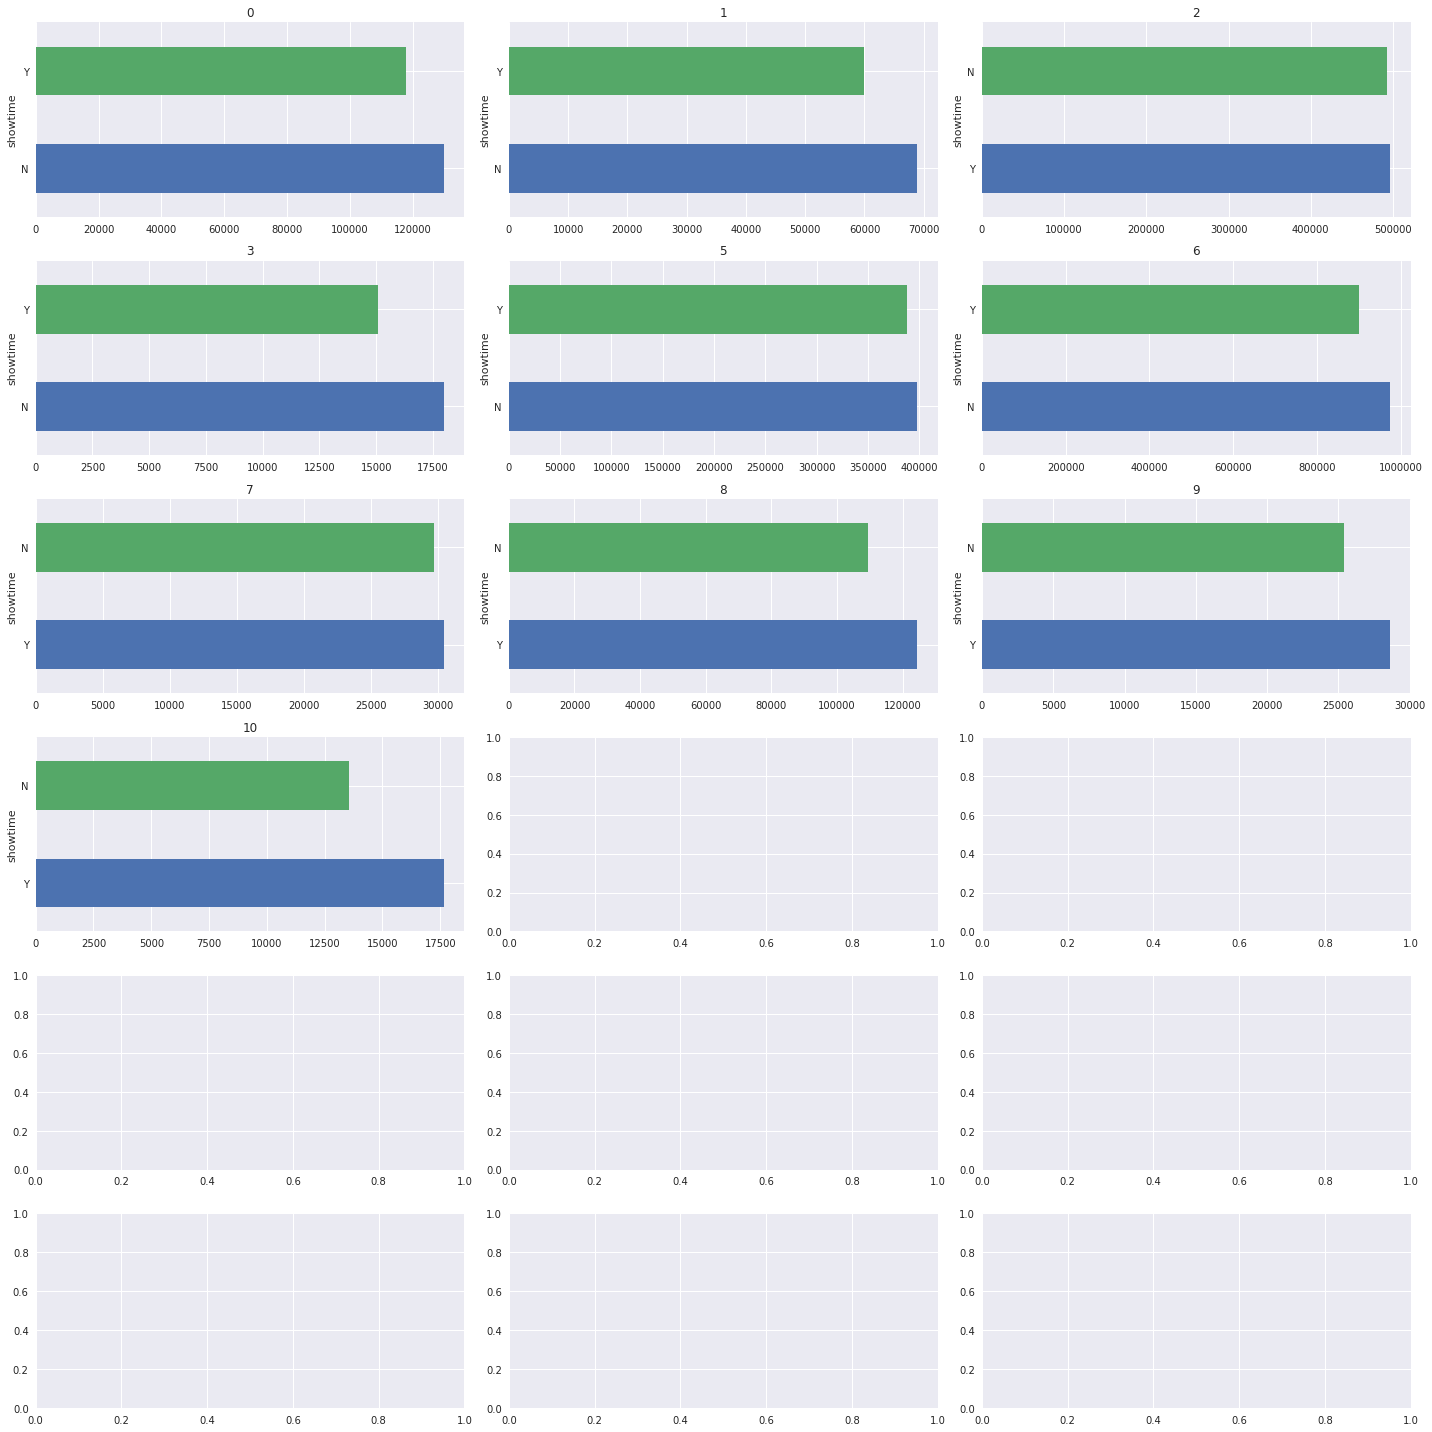

In [64]:
variable = "showtime"
df = merged_data.groupby(["prediction", variable]).size().unstack()
degList = [i for i in df.columns]

bar_l = range(10)

cm = plt.get_cmap('inferno')

f, ax = plt.subplots(1, figsize=(20,10))
ax.set_prop_cycle(cycler('color',[cm(1.*i/len(degList)) for i in range(len(degList))]))

bottom = np.zeros_like(bar_l).astype('float')
for i, deg in enumerate(degList):
    ax.bar(bar_l, df[deg]/df.sum(axis = 1), bottom = bottom, width=0.8, label=deg)
    bottom += df[deg].values/df.sum(axis = 1).values


ax.set_xticks(bar_l)
ax.set_xticklabels(df.index.values, size='x-small')
ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=1)
f.subplots_adjust(right=1, bottom=0.3)
plt.title(variable.capitalize(), size = 20)
plt.xlabel("Clusters", size = 15)
plt.ylabel("Percentage", size = 15)
f.show()

agency_borough = merged_data.groupby([variable, "prediction"]).size().unstack()
#We'll arrange the subplots in three rows and two columns. 
#Since we have only 5 boroughs, one plot will be blank
COL_NUM = 3
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))

for i, (borough, agency_count) in enumerate(agency_borough.items()):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    agency_count = agency_count.sort_values(ascending=False)[:5] 
    agency_count.plot(kind='barh', ax=ax)
    ax.set_title(borough)

# FYI - plt.tight_layout()
plt.tight_layout()



<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Presence of a male in the household </b> </h2> </center></font></div>

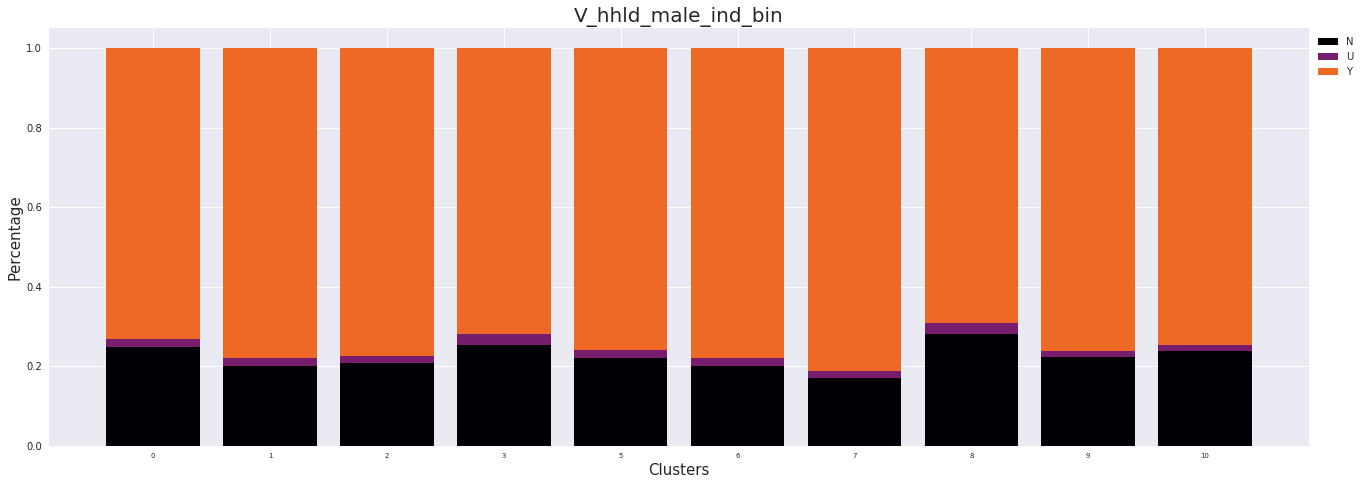

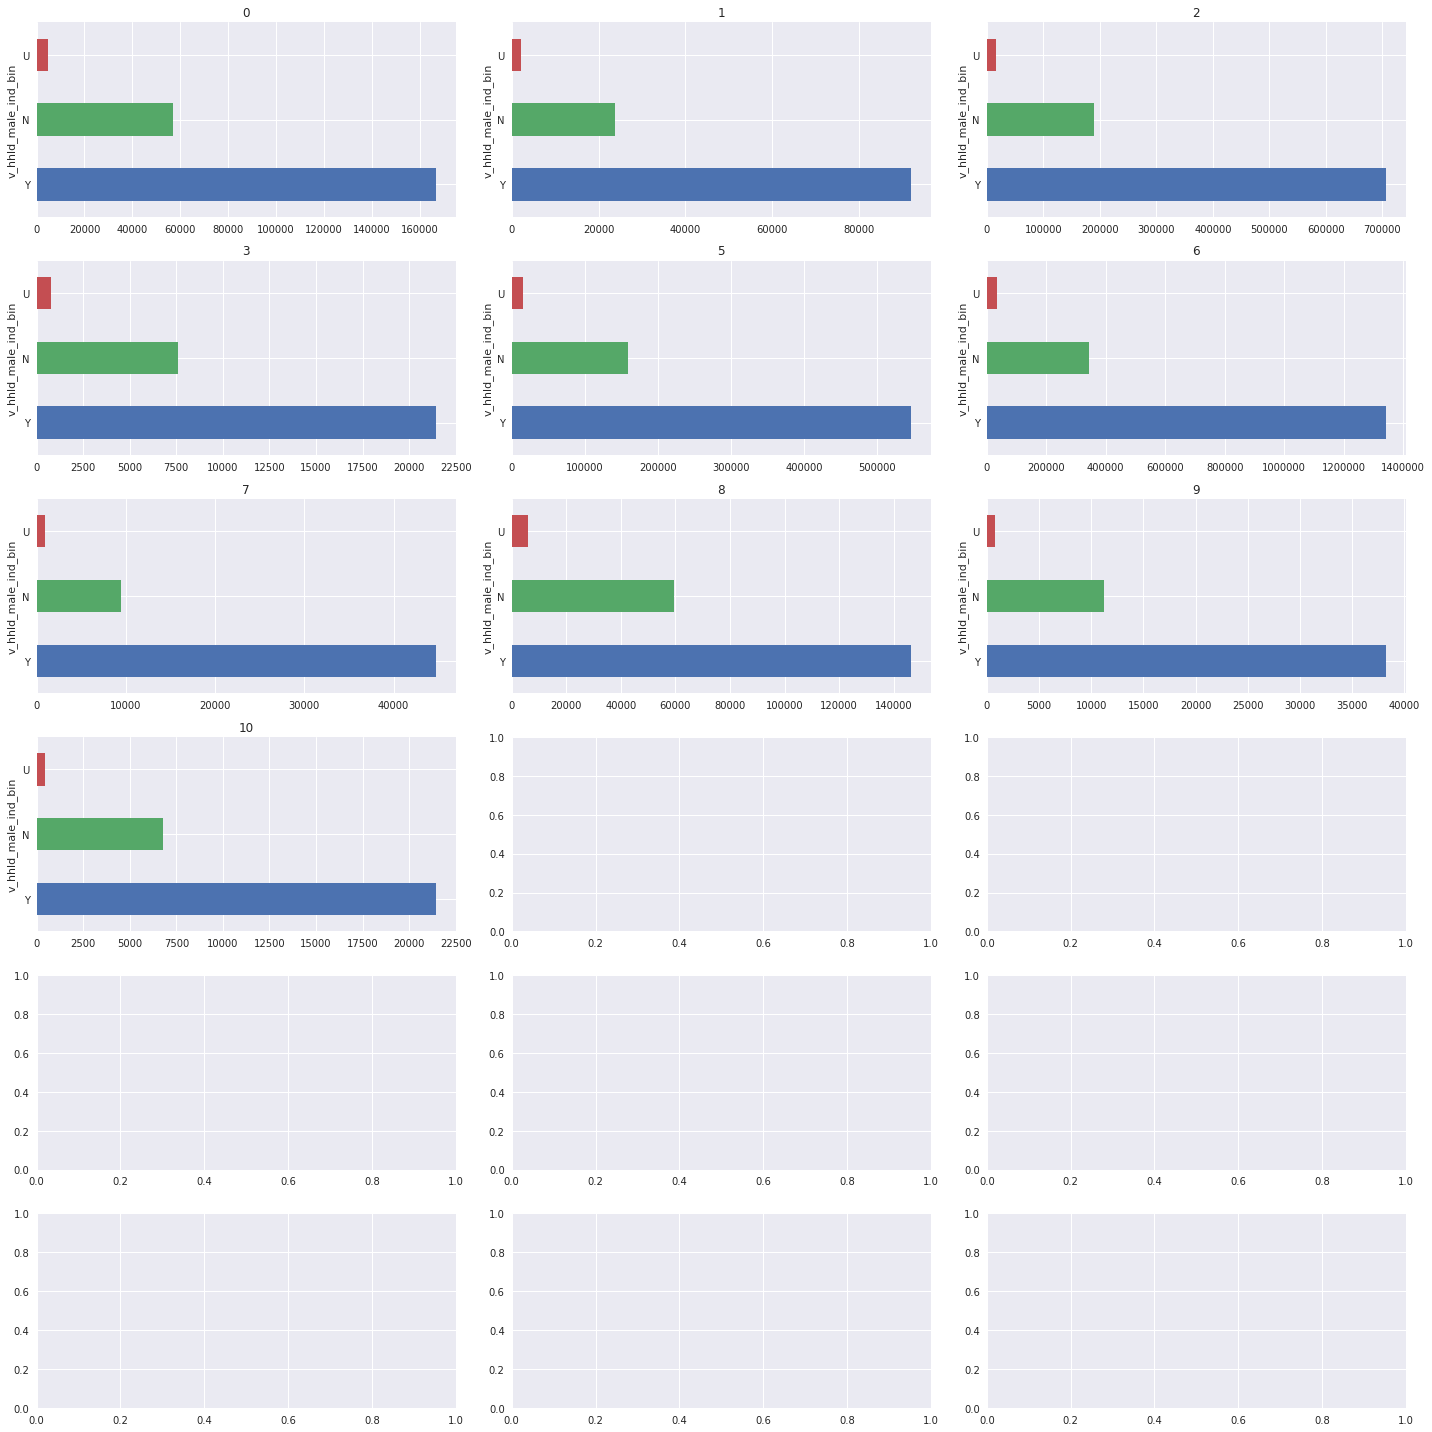

In [107]:
variable = "v_hhld_male_ind_bin"
df = merged_data.groupby(["prediction", variable]).size().unstack()
degList = [i for i in df.columns]

bar_l = range(10)

cm = plt.get_cmap('inferno')

f, ax = plt.subplots(1, figsize=(20,10))
ax.set_prop_cycle(cycler('color',[cm(1.*i/len(degList)) for i in range(len(degList))]))

bottom = np.zeros_like(bar_l).astype('float')
for i, deg in enumerate(degList):
    ax.bar(bar_l, df[deg]/df.sum(axis = 1), bottom = bottom, width=0.8, label=deg)
    bottom += df[deg].values/df.sum(axis = 1).values


ax.set_xticks(bar_l)
ax.set_xticklabels(df.index.values, size='x-small')
ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=1)
f.subplots_adjust(right=1, bottom=0.3)
plt.title(variable.capitalize(), size = 20)
plt.xlabel("Clusters", size = 15)
plt.ylabel("Percentage", size = 15)
f.show()

agency_borough = merged_data.groupby([variable, "prediction"]).size().unstack()
#We'll arrange the subplots in three rows and two columns. 
#Since we have only 5 boroughs, one plot will be blank
COL_NUM = 3
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))

for i, (borough, agency_count) in enumerate(agency_borough.items()):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    agency_count = agency_count.sort_values(ascending=False)[:5] 
    agency_count.plot(kind='barh', ax=ax)
    ax.set_title(borough)

# FYI - plt.tight_layout()
plt.tight_layout()



<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Region </b> </h2> </center></font></div>

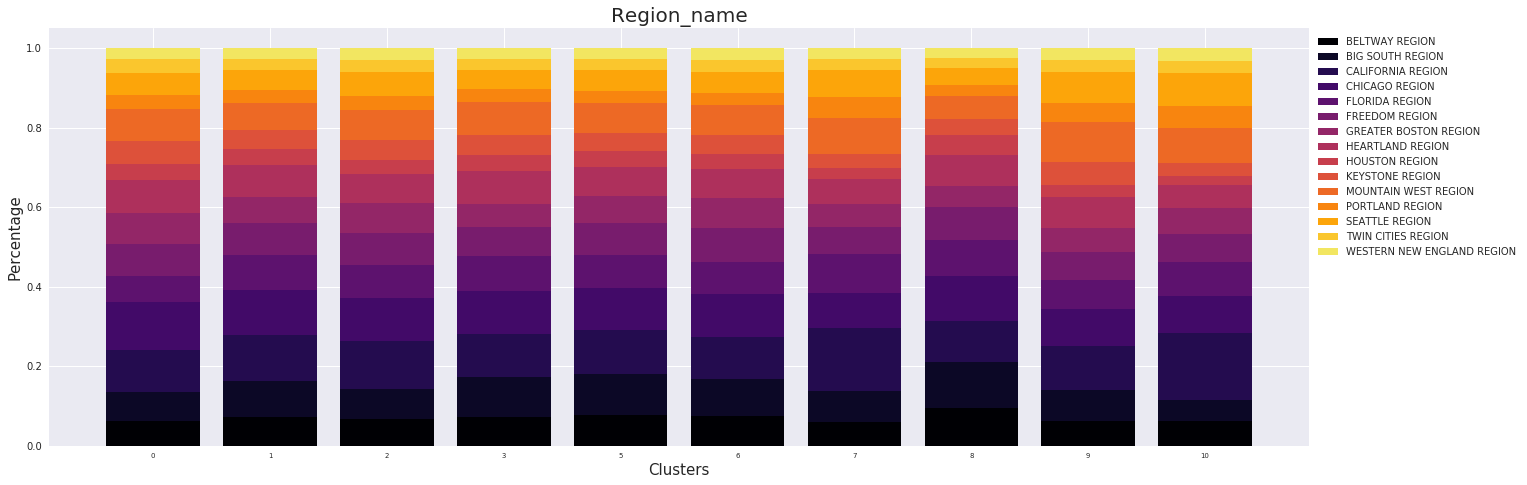

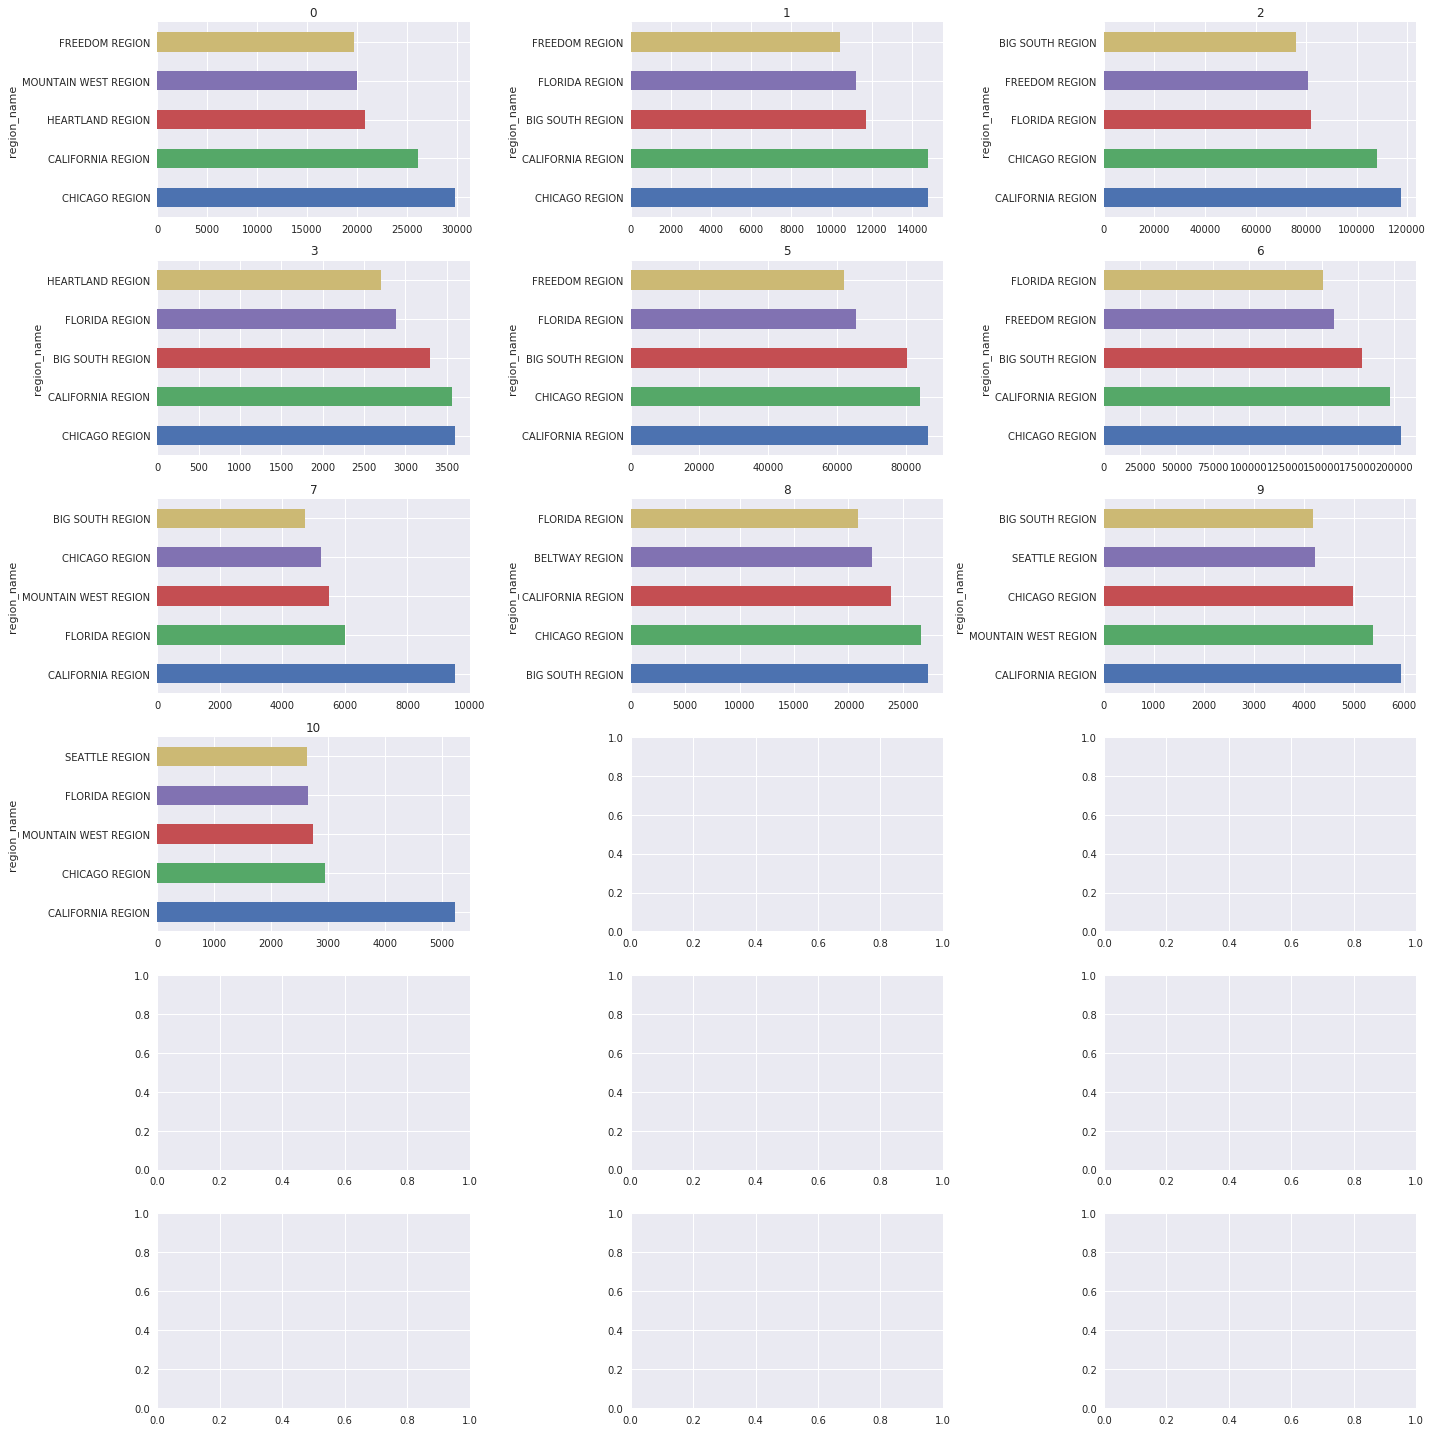

In [108]:
variable = "region_name"
df = merged_data.groupby(["prediction", variable]).size().unstack()
degList = [i for i in df.columns]

bar_l = range(10)

cm = plt.get_cmap('inferno')

f, ax = plt.subplots(1, figsize=(20,10))
ax.set_prop_cycle(cycler('color',[cm(1.*i/len(degList)) for i in range(len(degList))]))

bottom = np.zeros_like(bar_l).astype('float')
for i, deg in enumerate(degList):
    ax.bar(bar_l, df[deg]/df.sum(axis = 1), bottom = bottom, width=0.8, label=deg)
    bottom += df[deg].values/df.sum(axis = 1).values


ax.set_xticks(bar_l)
ax.set_xticklabels(df.index.values, size='x-small')
ax.legend(loc="upper left", bbox_to_anchor=(1,1), ncol=1)
f.subplots_adjust(right=1, bottom=0.3)
plt.title(variable.capitalize(), size = 20)
plt.xlabel("Clusters", size = 15)
plt.ylabel("Percentage", size = 15)
f.show()

agency_borough = merged_data.groupby([variable, "prediction"]).size().unstack()
#We'll arrange the subplots in three rows and two columns. 
#Since we have only 5 boroughs, one plot will be blank
COL_NUM = 3
ROW_NUM = 6
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))

for i, (borough, agency_count) in enumerate(agency_borough.items()):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    agency_count = agency_count.sort_values(ascending=False)[:5] 
    agency_count.plot(kind='barh', ax=ax)
    ax.set_title(borough)

# FYI - plt.tight_layout()
plt.tight_layout()



<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Top Channels by cluster </b> </h2> </center></font></div>

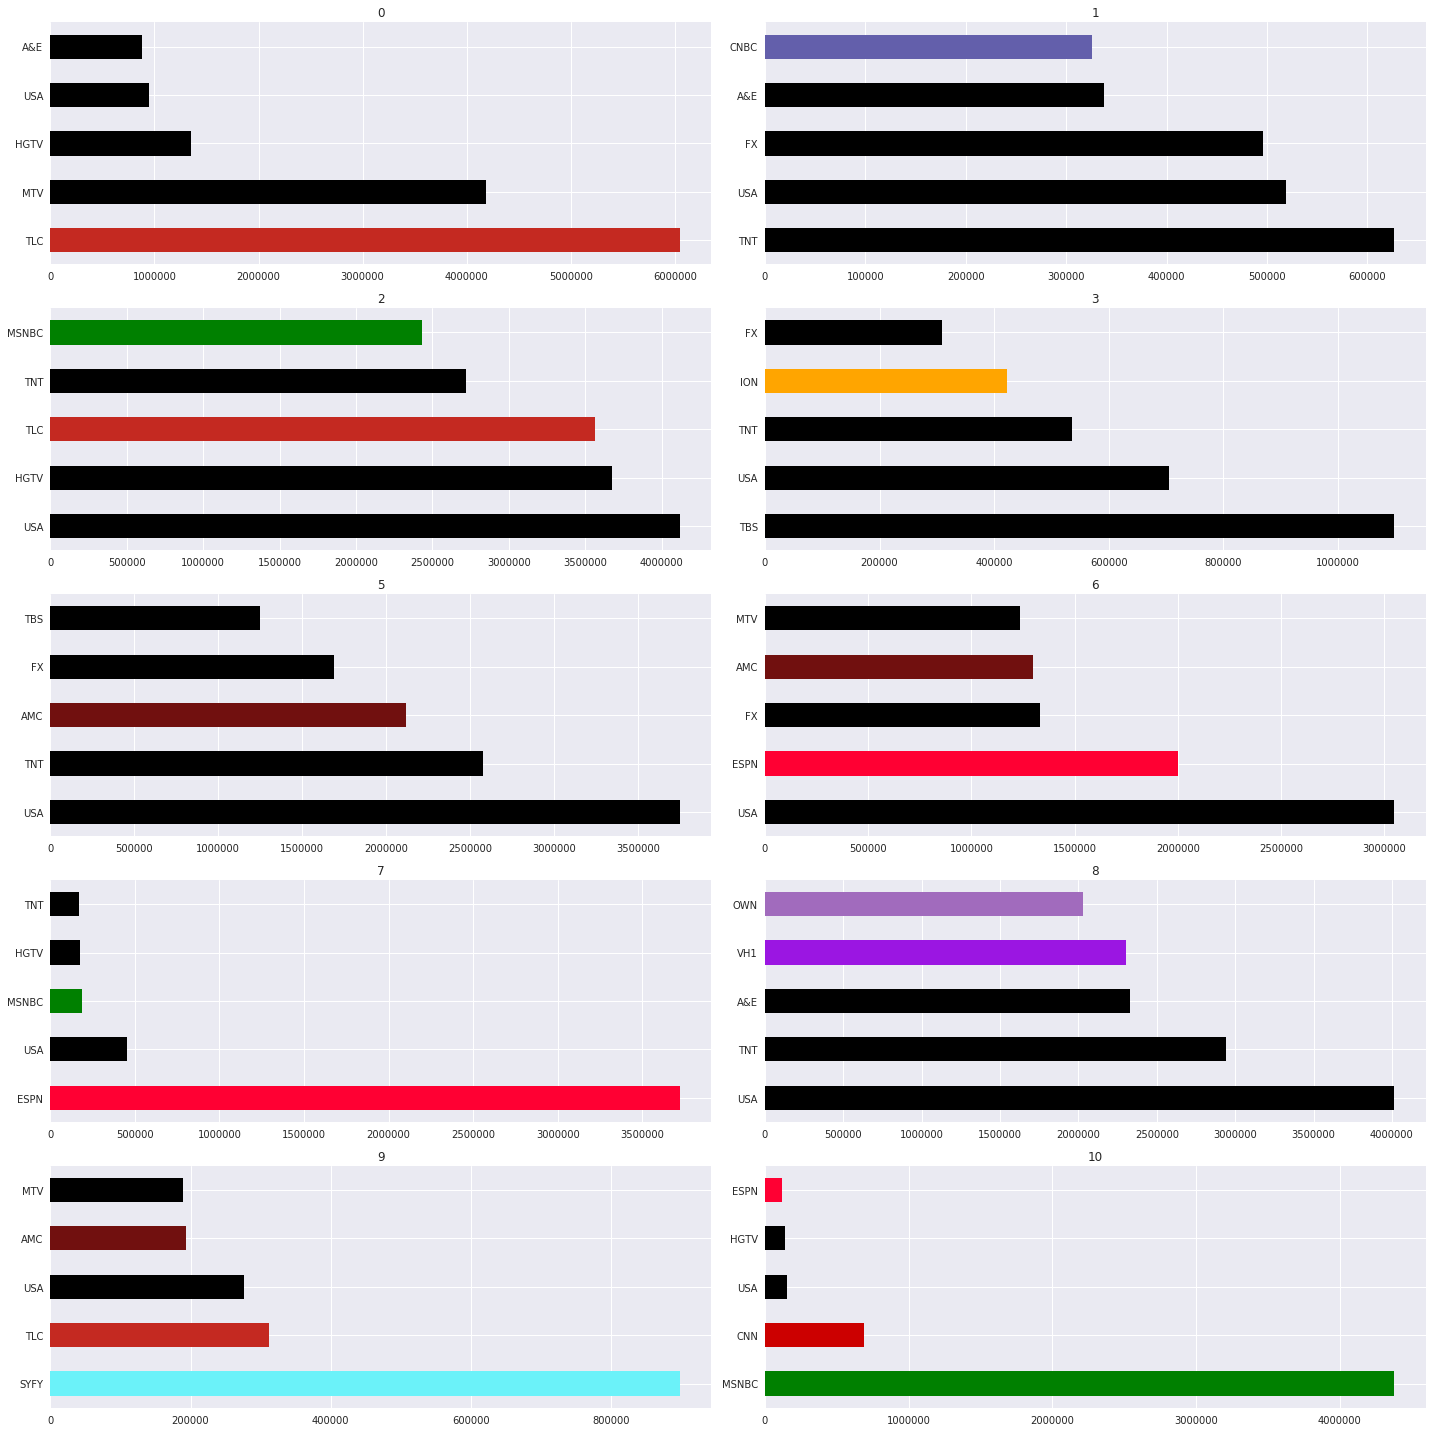

In [103]:
agency_borough = merged_data.groupby(["prediction"]).sum().loc[:,['A&E', 'AMC', 'BET',
       'CMT', 'CNBC', 'CNN', 'E!', 'ESPN', 'ESPNU', 'FX', 'FXM', 'FXX', 'GAC',
       'GSN', 'HGTV', 'HLN', 'IFC', 'INSP', 'ION', 'MSNBC', 'MTV', 'MTV2',
       'NBA TV', 'OWN', 'SYFY', 'TBS', 'TLC', 'TNT', 'UNIVERSO', 'UP', 'USA',
       'VH1', 'VICELAND']].transpose()

dicol = {'A&E':'#000000', 'AMC': "#71100f", 'BET': "#000000",
       'CMT': "#000000", 'CNBC': "#635FAB", 'CNN':"#CC0000", 'E!':"#FFFFFF", 
         'ESPN': "#FF0033", 'ESPNU': "#FF0033", 'FX': "#000000", 'FXM':"#000000", 
         'FXX': "#000000", 'GAC': "purple", 'GSN': "orange", 'HGTV': "black", 'HLN': "#0000A0",
         'IFC': "black", 'INSP': "#FFB200", 'ION': "orange", 'MSNBC': "green", 'MTV':"black", 
         'MTV2':"#E2D63D",'NBA TV': "#C9082A", 'OWN':"#A16BBD", 'SYFY':"#6BF2F9", 'TBS':"black", 
         'TLC':"#C42921", 'TNT':"black", 'UNIVERSO':"green", 'UP':"#E27616", 'USA': "black",
       'VH1':"#9B16E2", 'VICELAND':"black"}

COL_NUM = 2
ROW_NUM = 5
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))

for i, (borough, agency_count) in enumerate(agency_borough.items()):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    agency_count = agency_count.sort_values(ascending=False)[:5] 
    colors = [dicol[i] for i in agency_count.keys()]
    agency_count.plot(kind='barh', ax=ax, color = colors)
    ax.set_title(borough)

# FYI - plt.tight_layout()
plt.tight_layout()

In [111]:
merged_data.columns

Index(['duration_seconds', 'viewing_duration_seconds', 'station_hdtv',
       'station_sdtv', 'station_sports', 'station_tve', 'A&E', 'AMC', 'BET',
       'CMT', 'CNBC', 'CNN', 'E!', 'ESPN', 'ESPNU', 'FX', 'FXM', 'FXX', 'GAC',
       'GSN', 'HGTV', 'HLN', 'IFC', 'INSP', 'ION', 'MSNBC', 'MTV', 'MTV2',
       'NBA TV', 'OWN', 'SYFY', 'TBS', 'TLC', 'TNT', 'UNIVERSO', 'UP', 'USA',
       'VH1', 'VICELAND', 'Drama_view', 'Sports_view', 'Reality_view',
       'Entertainment_view', 'Documentary_view', 'Kids_view', 'Family_view',
       'Animals_view', 'News_view', 'Movie_view', 'Music_view', 'Teen_view',
       'Science & Technology_view', 'Health & Fitness_view', 'Religion_view',
       'Shopping_view', 'Misellaneous_view', 'Drama_d', 'Sports_d',
       'Reality_d', 'Entertainment_d', 'Documentary_d', 'Kids_d', 'Family_d',
       'Animals_d', 'News_d', 'Movie_d', 'Music_d', 'Teen_d',
       'Science & Technology_d', 'Health & Fitness_d', 'Religion_d',
       'Shopping_d', 'Misellaneous_d', '

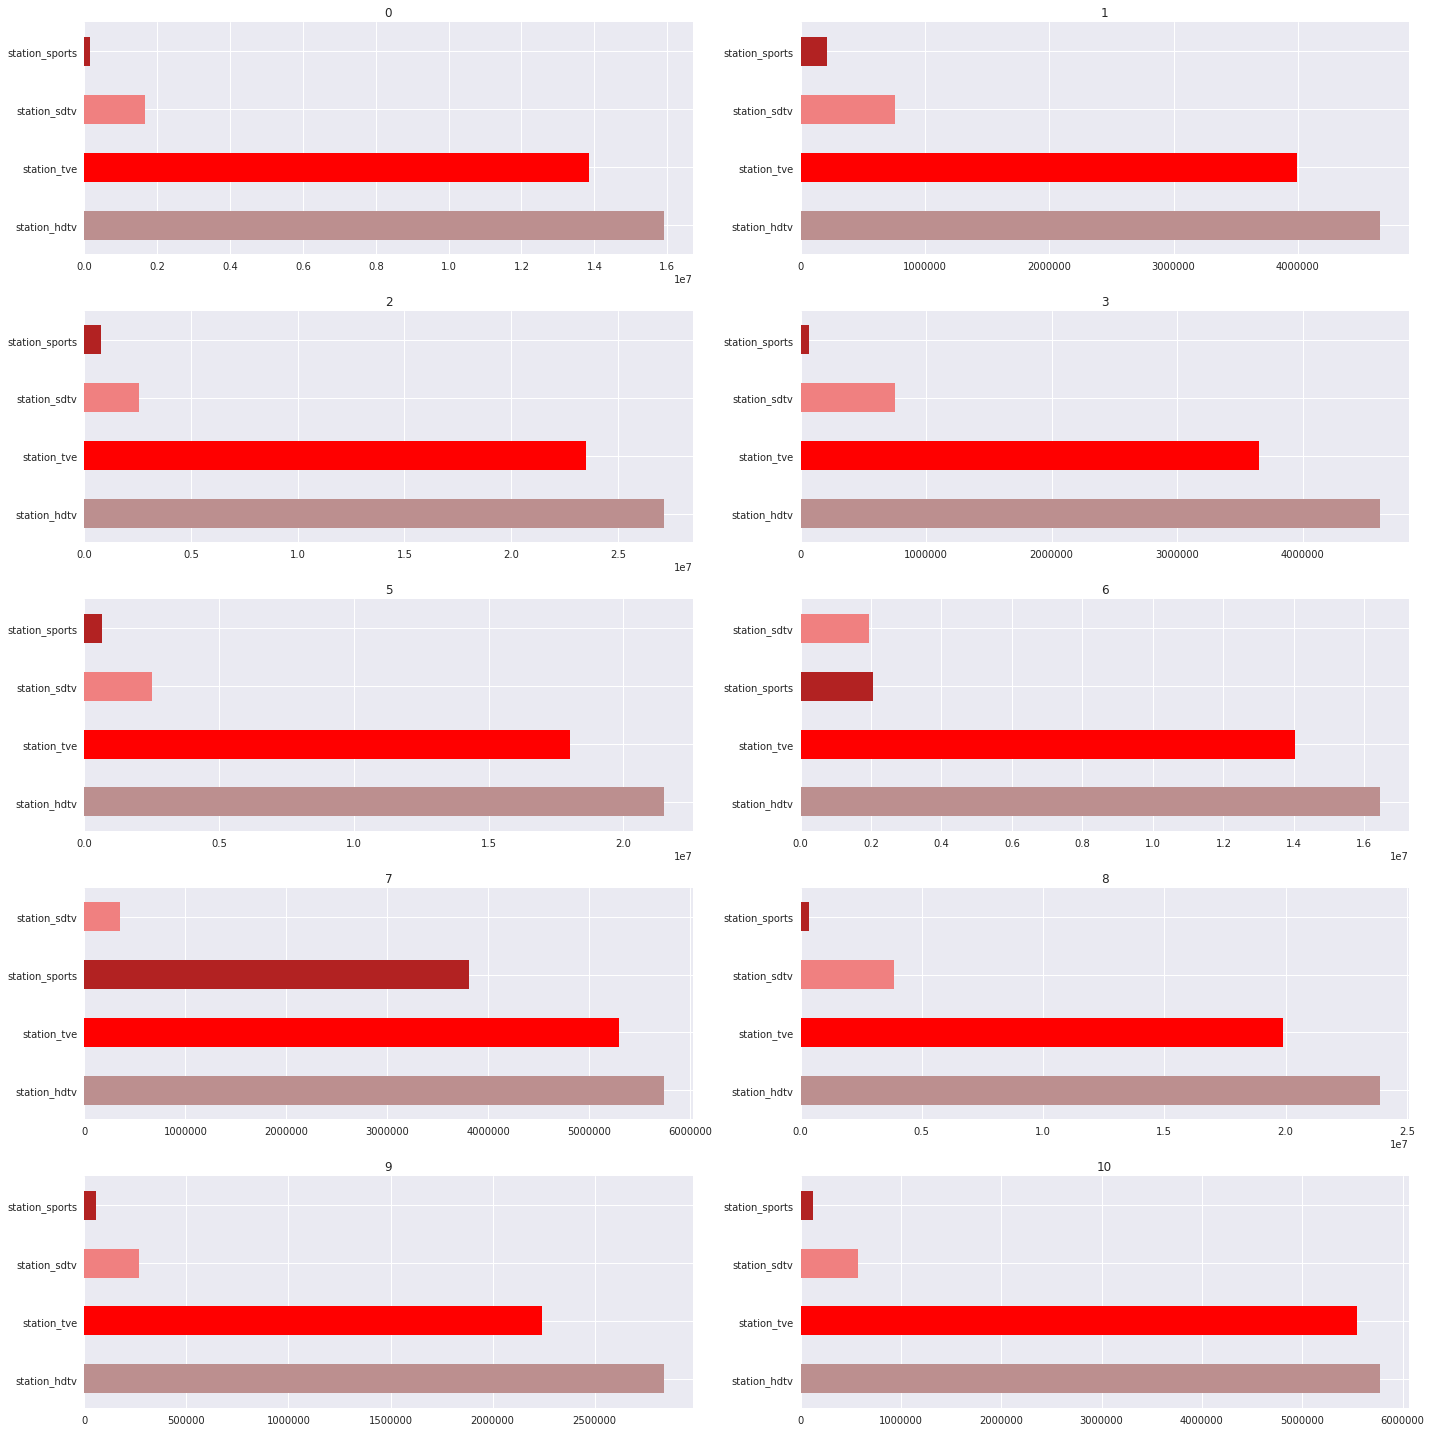

In [114]:
agency_borough = merged_data.groupby(["prediction"]).sum().loc[:,['station_hdtv',
       'station_sdtv', 'station_sports', 'station_tve']].transpose()



dicol = {'station_hdtv': 'rosybrown', 'station_sdtv':'lightcoral', 'station_sports':'firebrick', 'station_tve':'red'}


COL_NUM = 2
ROW_NUM = 5
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,20))

for i, (borough, agency_count) in enumerate(agency_borough.items()):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    agency_count = agency_count.sort_values(ascending=False)[:5] 
    colors = [dicol[i] for i in agency_count.keys()]
    agency_count.plot(kind='barh', ax=ax, color = colors)
    ax.set_title(borough)

# FYI - plt.tight_layout()
plt.tight_layout()

<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Top Categories per cluster </b> </h2> </center></font></div>

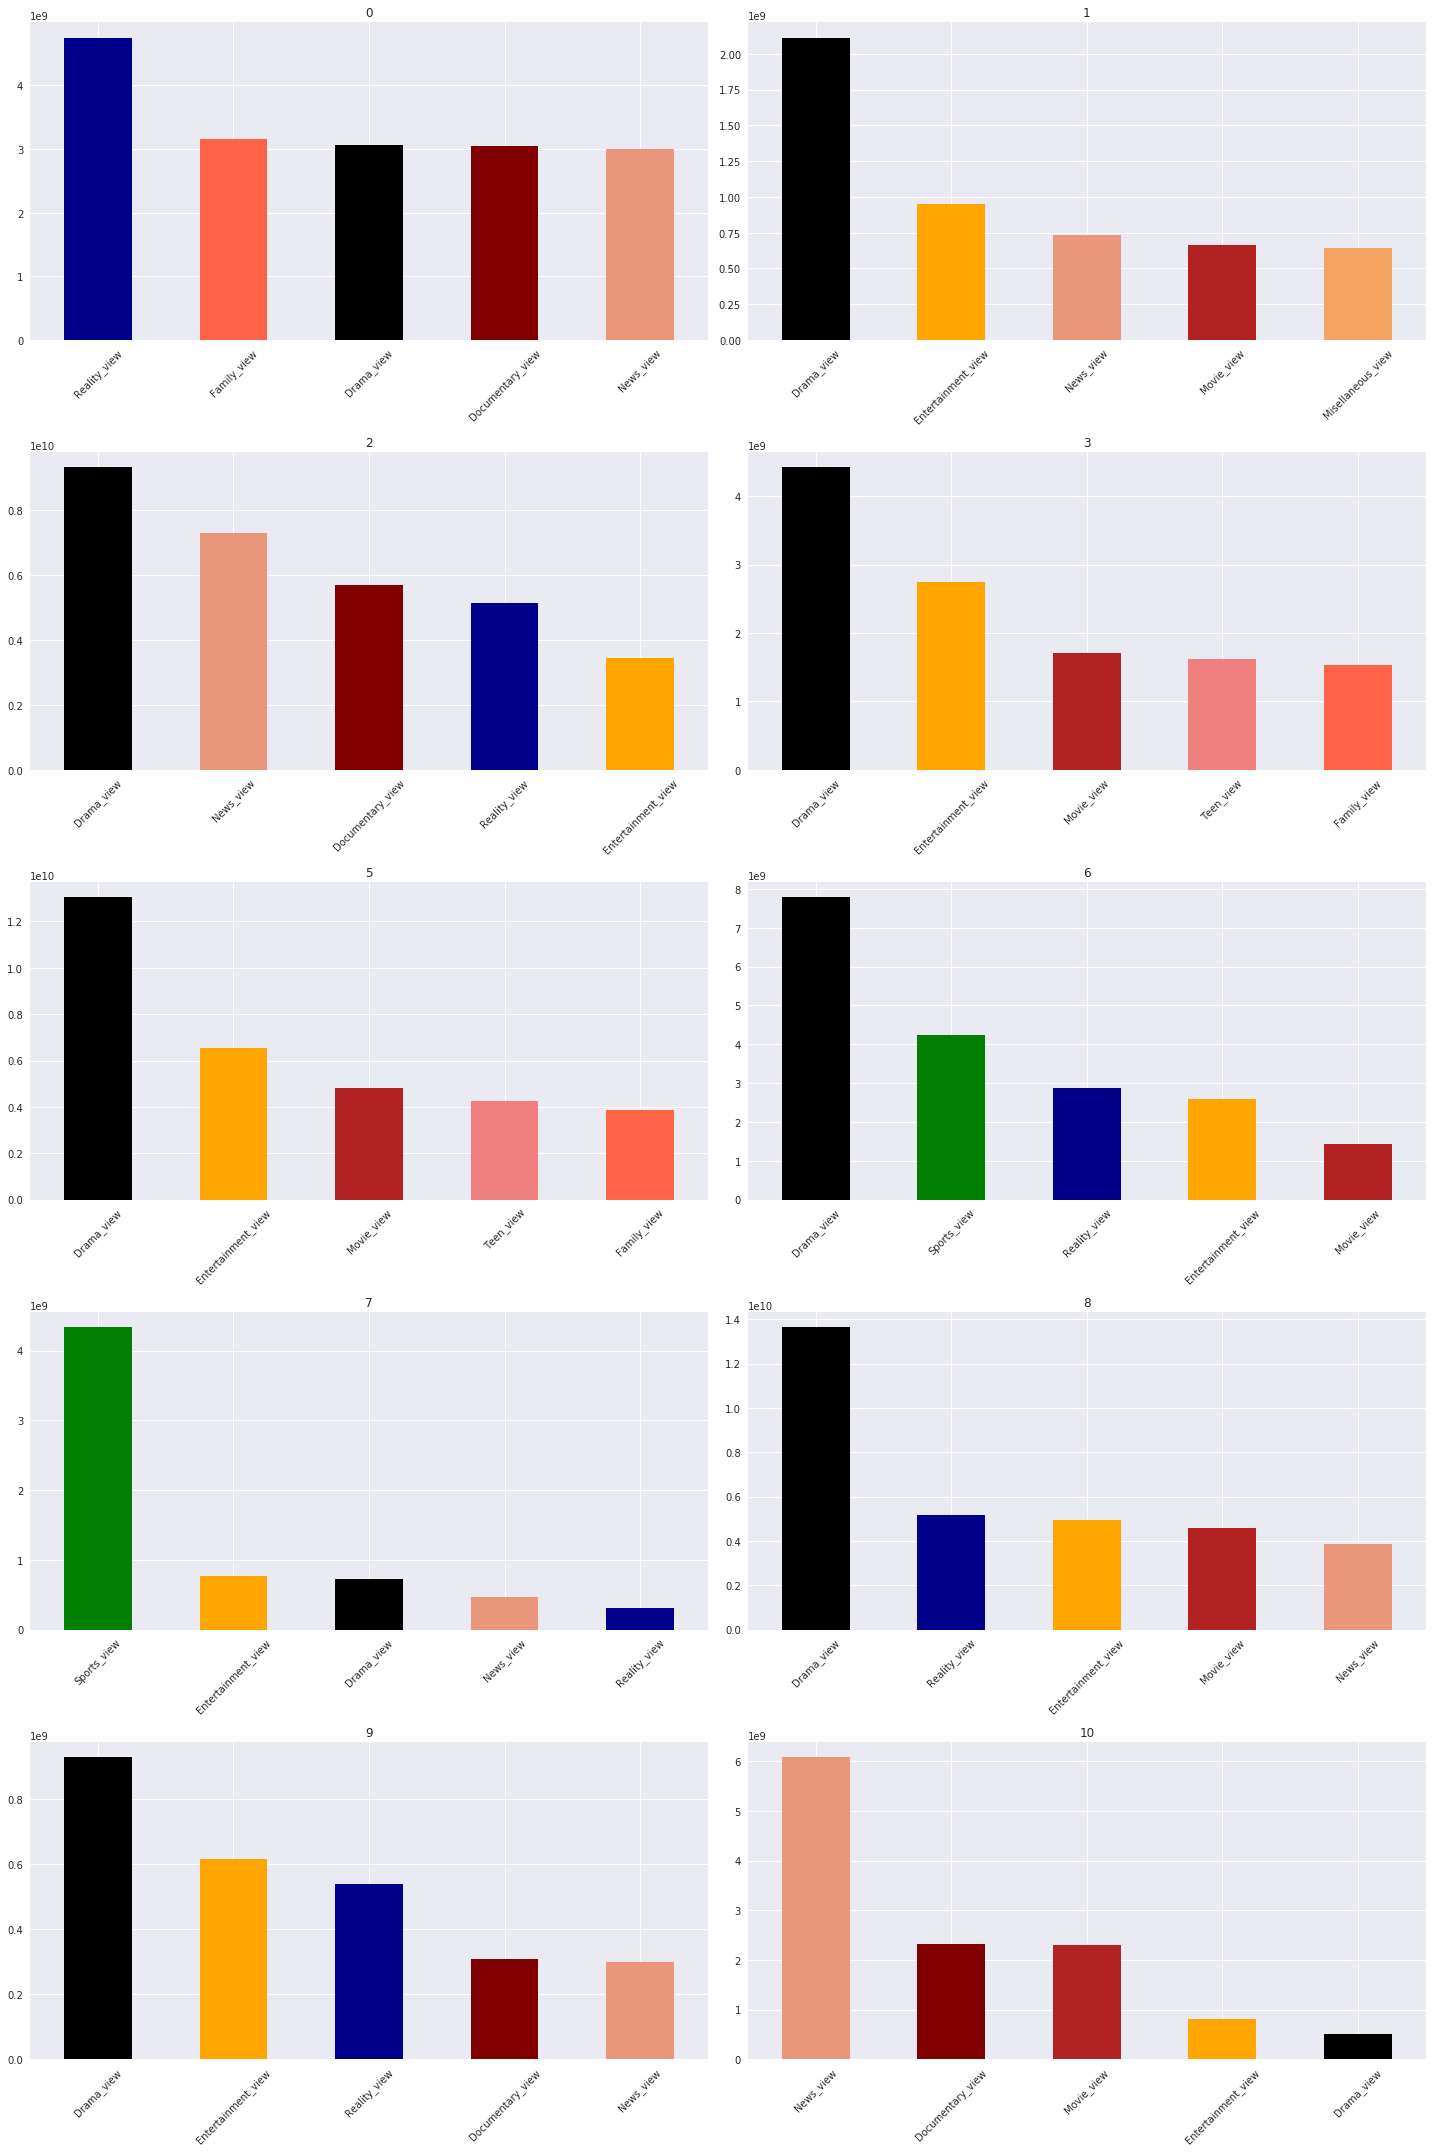

In [121]:
agency_borough = merged_data.groupby(["prediction"]).sum().loc[:,['Drama_view', 'Sports_view', 'Reality_view',
       'Entertainment_view', 'Documentary_view', 'Kids_view', 'Family_view',
       'Animals_view', 'News_view', 'Movie_view', 'Music_view', 'Teen_view',
       'Science & Technology_view', 'Health & Fitness_view', 'Religion_view',
       'Shopping_view', 'Misellaneous_view']].transpose()



dicol = {'Drama_view':'black', 'Sports_view':'green', 'Reality_view':'darkblue',
       'Entertainment_view':"orange", 'Documentary_view':'maroon', 'Kids_view':'darkgoldenrod', 
         'Family_view':'tomato','Animals_view':'lightsalmon', 'News_view':'darksalmon', 
         'Movie_view':'firebrick', 'Music_view':'rosybrown', 'Teen_view':'lightcoral',
       'Science & Technology_view':'brown', 'Health & Fitness_view':'darksalmon', 
         'Religion_view':'orangered','Shopping_view':'sienna', 'Misellaneous_view':"sandybrown"}


COL_NUM = 2
ROW_NUM = 5
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(20,30))

for i, (borough, agency_count) in enumerate(agency_borough.items()):
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    agency_count = agency_count.sort_values(ascending=False)[:5] 
    colors = [dicol[i] for i in agency_count.keys()]
    agency_count.plot(kind='bar', ax=ax, rot = 45, color = colors)
    ax.set_title(borough)

# FYI - plt.tight_layout()
plt.tight_layout()

<div class="alert alert-block alert-success"> <font color ="ForestGreen"><center> <h2> <b> Viewers Duration </b> </h2> </center></font></div>

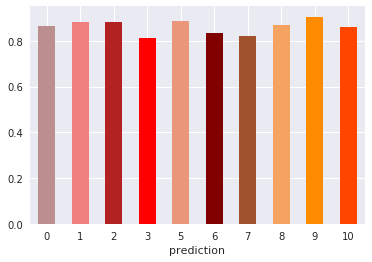

In [131]:
df = merged_data.groupby(["prediction"]).mean()
(df["viewing_duration_seconds"]/df["duration_seconds"]).plot(kind = "bar", rot = 0, color = ['rosybrown', 'lightcoral', 'firebrick', 'red', 'darksalmon',
                                                          'maroon', 'sienna', 'sandybrown', 'darkorange', 'orangered',
                                                          'chocolate', 'orange', 'darkgoldenrod', 'brown', 'saddlebrown',
                                                          'tomato', 'lightsalmon'])




Text(0, 0.5, 'Number of shows')

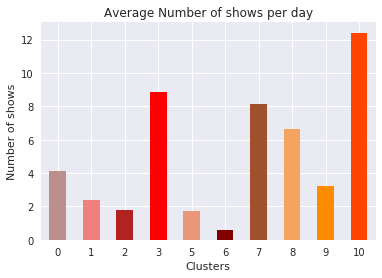

In [144]:
agency_borough = merged_data.groupby(["prediction"]).sum().loc[:,['station_hdtv',
       'station_sdtv', 'station_sports', 'station_tve']]

(agency_borough.sum(axis = 1)/(31*merged_data.groupby(["prediction"]).size())).plot(kind = "bar", rot = 0, color = ['rosybrown', 'lightcoral', 'firebrick', 'red', 'darksalmon',
                                                          'maroon', 'sienna', 'sandybrown', 'darkorange', 'orangered',
                                                          'chocolate', 'orange', 'darkgoldenrod', 'brown', 'saddlebrown',
                                                          'tomato', 'lightsalmon'])
plt.title("Average Number of shows per day")
plt.xlabel("Clusters")
plt.ylabel("Number of shows")

